<a href="https://colab.research.google.com/github/julianafalves/Parallel_Binary_Search_Tree/blob/main/Trabalho_PPD_Binary_Search_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore Binária de Busca Ótima

O objetivo deste trabalho é estudar soluções paralelas que possuam melhor performance de criação de árvores binárias de busca ótimas.

## Programação Paralela e Distribuída

### Professor

- Helio Crestana Guardia

### Grupo

- Alisson Nunes (RA 725862)
- Fernando Cincinato Alves de Oliveira (RA 790947)
- Giovani Guidini (RA 790862)
- Juliana Ferreira Alves (RA 744794)

# Introdução

Uma árvore de busca binária é uma maneira de organizar n chaves de um conjunto ordenado linearmente para garantir sua recuperação em tempo *Θ(log n)*. Dada a probabilidade de cada chave ser acessada, nossa tarefa consiste em criar uma árvore binária de busca ótima que minimize o tempo médio de busca.

Mas antes disso, vamos recordar alguns conceitos básicos até chegarmos na árvore binária de busca ótima.


## Árvore

<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1Vy0gSDFW8oRveeBn8YptPxORio_85RT6" height="200px" alt="tree" />
</div>

Uma árvore é uma estrutura de dados composta de nós, com as seguintes características:

1. Cada árvore tem um nó raiz em seu ponto superior (também conhecido como Nó Pai) contendo algum valor (com qualquer tipo de dados).
1. O nó raiz tem zero ou mais "nós filhos".
1. Cada nó filho tem zero ou mais "nós filhos" e assim por diante. Isso cria uma subárvore interna à árvore. Cada nó tem sua própria subárvore feita dos filhos e dos filhos dos filhos e assim por diante. Isso quer dizer que cada nó pode ser uma árvore por si só.


## Árvore Binária de Busca

<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1wFgmVz9PA9sAageQyGOOY2uHcar_zh3U" height="300px" alt="binary search tree" />
</div>

Uma árvore binária de busca (ou BST, do inglês binary search tree) tem, além disso, as duas características abaixo:

1. Cada nó pode ter, no máximo, dois filhos.
1. Para cada nó, os valores de seus descendentes da esquerda são inferiores ao valor do nó atual, que, por sua vez, é inferior aos nós descendentes da direita (se existirem).

As BST tem como base a ideia do algoritmo de busca binária, que permite uma procura, inserção e remoção rápidas dos nós. A maneira como estão configurados representa, em média, que cada comparação permite que as operações evitem passar por cerca de metade da árvore. Assim, cada procura, inserção ou remoção  leva um tempo proporcional ao logaritmo do número de itens armazenados na árvore, O(log n). Entretanto, em algumas situações, podemos ter o pior dos casos, em que a árvore não está balanceada e a complexidade de tempo passa a ser O(n)  para essas três funções. É por isso que árvores autobalanceadas (AVL, rubro-negra etc.) são muito mais eficazes que a BST básica.

## Árvore Binária de Busca Ótima

<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1QQF4o3lJ8VGMjIQOi-0K7OuA-Iyv-7_6" height="300px" alt="binary search tree" />
</div>

Há situações em que sabemos com antecedência quais as chaves que serão buscadas e, mais ainda, com que frequência ou probabilidade cada chave será buscada. Nesse caso, podemos construir uma árvore binária de busca ótima que será eficiente para a operação de busca. Inserções e remoções não são usualmente efetuadas na árvore assim construída pois elas podem modificar a sua estrutura. Caso inserções e remoções são permitidas, então se deve periodicamente reconstruir a árvore ótima. A melhor árvore binária de busca depende das probabilidades de acesso das chaves. Quando a distribuição dessas
probabilidades não é uniforme, a melhor árvore binária de busca
não é necessáriamente uma árvore binária perfeitamente
balanceada. Intuitivamente, queremos colocar as chaves mais
buscadas mais próximas ao topo da árvore binária.

Para podermos comparar diferentes árvores, precisamos calcular o custo total de cada uma delas. O custo de um nó é calculado multiplicando sua frequência pelo seu nível na árvore (considerando que a raiz possui nível 1), e no final podemos somar o custo de todos os nós para encontrar o custo total da árvore. No exemplo da imagem a cima, a árvore da esquerda possui custo `0.2 * 1 + 0.2 * 2 + 0.25 * 2 + 0.3 * 3 + 0.05 * 3 = 2.15`, enquanto a árvore da direita possui custo `0.2 * 1 + 0.3 * 2 + 0.25 * 2 + 0.2 * 3 + 0.05 * 4 = 2.1`

# Solução sequencial

Na 1ª Maratona de Programação Paralela (MPP) foi apresentado uma solução sequencial para este problema, com o objetivo que os participantes criem suas versões paralelas.

Esse código, começa com a leitura dos dados de entrada, sendo o primeiro um número inteiro representando a quantidade `n` de nós da árvore, seguido de uma sequência de `n` números reais que representam a probabilidade de cada nó. Repare que o valor de cada nó (informação armazenada) é irrelevante, pois a ordem dos nós (da esquerda para a direita) não deve ser alterada.

## Main

A função `main` não exerce nenhuma ação essencial do algoritmo, apenas realiza a alocação e leitura dos dados para depois chamar a função auxiliar.

In [ ]:
%%writefile main.cc

#include"obst.hh"
#include<iostream>
#include<malloc.h>
#include<sys/time.h>
#include<time.h>
using namespace std;
int main(int argc,char** argv) try {
    struct timeval timevalA;
    struct timeval timevalB;

    gettimeofday(&timevalA,NULL);
    int i;
    int n;
    float* p;
    fscanf(stdin,"%d",&n);
    p=(float*)malloc(n*sizeof(float));
    for(i=0;i<n;i++)
        fscanf(stdin,"%f",&p[i]);
    int* output=new int[n];
    obst(output,n,p);
    gettimeofday(&timevalB,NULL);

    for(int i=0;i<n;++i) {
        //cout<<output[i]<<endl;
    }
    cout<<timevalB.tv_sec-timevalA.tv_sec+(timevalB.tv_usec-timevalA.tv_usec)/(double)1000000<<endl;

    return EXIT_SUCCESS;
}
catch(...) {
    cerr<<"EXIT_FAILURE";
    return EXIT_FAILURE;
}

Writing main.cc


## Função auxiliar

A função `obst` é onde se concentra todo o algoritmo. Ela recebe o array onde será armazenado a árvore resultante, o número de nós da árvore e o array de probabilidades.

Após a alocação de variáveis, o código começa a iterar em cada elemento do array de probabilidades (de trás para frente) e para cada um deles, itera novamente para cada próximo elemento a fim de realizar o cálculo em todos os intervalos de nós até chegar ao intervalo que inclua todos os nós.

<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1affzQHUlhOLUZqNHNX5uFQzeU4xCNn1g" alt="analysing all intervals from probabilities array" />
</div>

Por fim, o cálculo principal a ser realizado em cada um dos intervalos é iterar em todos os nós do intervalo, somando o custo da subávore formada pelos elementos à esquerda com o custo da subávore formada pelos elementos à direita, em busca da manor soma (menor custo do intervalo) dentro desse intervalo. Nessa soma, também é incluído a soma de todas probabilidades dos elementos no intervalo, visto que ao adicionar uma nova raíz na árvore, o nível dos nós nas subávores aumenta em 1.

Ao encontrar o menor custo do intervalo, o custo é armazenado para ser utilizado nas próximas iterações, assim como a raiz atual para no final poder reconstruir a árvore completa.

<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1Oi2IeHwOqetsW-ptfZYuh9dEpFmHPbM6" alt="tree evolving from probabilities array" />
</div>

In [ ]:
%%writefile obst.hh

void print_root(int**,int,int);

/**
 * @param argc the argc
 * @param argv the argv
 * @param output the output
 * @param n the size of the probabilities vector
 * @param p the probabilities vector
 */
void obst(int* output,int n,float* p);

Writing obst.hh


In [ ]:
%%writefile obst-seq.cc

#include<cstdlib>
#include<cstdio>
#include<limits>
using namespace std;
void alloc_matrix(void*** a,int m,int n,int size) {
    int i;
    void* storage;
    storage=(void*)malloc(m*n*size);
    *a=(void**)malloc(m*sizeof(void*));
    for(i=0;i<m;i++) {
        (*a)[i]=(char*)storage+i*n*size;
        //(*a)[i]=storage+i*n*size;
    }
}
void print_root(int& p,int* output,int** root,int low,int high) {
    output[p++]=root[low][high+1];
  printf("Root of the tree spanning %d-%d is %d\n",low,high,root[low][high+1]);
    if(low<=root[low][high+1]-1)
        print_root(p,output,root,low,root[low][high+1]-1);
    if(root[low][high+1]<=high-1)
        print_root(p,output,root,root[low][high+1]+1,high);
}
void obst(int* output,int n,float* p) {
    /*
    Resumo sobre as variaveis utilizadas:
    cost : matriz que armazena o custo de todas as subárvores possíveis.
           Exemplo: cost[2][4] -> armazena o custo da obst que contém os 
           nós 2, 3 e 4. 
           cost[0][n] mostra o custo da a
           
    root : matriz que armazena as raízes
    */
    float bestcost;
    int bestroot;
    float** cost;
    int low;
    int j;
    int high;
    int r;
    float rcost;
    int** root;
    alloc_matrix((void***)&root,n+1,n+1,sizeof(int));
    alloc_matrix((void***)&cost,n+1,n+1,sizeof(float));
    for(low=n;low>=0;low--) {
        cost[low][low]=0.0;
        root[low][low]=low;
        for(high=low+1;high<=n;high++) {
            bestcost=numeric_limits<float>::max();
            for(r=low;r<high;r++) {
                rcost=cost[low][r]+cost[r+1][high];
                for(j=low;j<high;j++) rcost+=p[j];
                
                if(rcost<bestcost) {
                    bestcost=rcost;
                    bestroot=r;
                }
            }
            cost[low][high]=bestcost;
            root[low][high]=bestroot;
        }
    }
    int tmp=0;
    print_root(tmp,output,root,0,n-1);
}


Overwriting obst-seq.cc


## Entrada de valores

Como na função `main` utilizamos o `fscanf` com `stdin`, podemos inserir os valores de entrada em um arquivo que será passado para o programa no momento da execução.

Os valores fornecidos na MPP oferem valores de 8 nós:

In [ ]:
%%writefile bst.in

8
.16
.13
.06
.08
.07
.17
.05
.28

Writing bst.in


Mas podemos gerar sequências maiores, para aumentar o tempo de execução do programa:

In [ ]:
%%writefile bst-20.in

20
0.01
0.02
0.02
0.01
0.06
0.07
0.08
0.1
0.07
0.02
0.02
0.03
0.13
0.02
0.11
0.05
0.03
0.12
0.01
0.01
0.01

Writing bst-20.in


In [ ]:
%%writefile bst-50.in

50
0.037
0.022
0.014
0.004
0.016
0.001
0.044
0.041
0.036
0.054
0.003
0.001
0.044
0.028
0.03
0.035
0.001
0.001
0.003
0.002
0.021
0.011
0.002
0.001
0.01
0.01
0.003
0.021
0.012
0.045
0.026
0.05
0.015
0.006
0.045
0.001
0.001
0.001
0.049
0.016
0.052
0.008
0.014
0.045
0.007
0.052
0.03
0.001
0.005
0.02
0.003

Writing bst-50.in


### Maiores quantidades

Abaixo, seguem arquivos para comparação de quantidades maiores de dados.

#### 100 nós

In [ ]:
%%writefile bst-100.in

100
0.018623
0.017983
0.021337
0.001729
0.000883
0.001935
0.015302
0.008303
0.005121
0.023411
0.005797
0.015722
0.019287
0.015706
0.008394
0.00169
0.000034
0.001114
0.002431
0.000132
0.020324
0.014254
0.005437
0.020883
0.011834
0.001266
0.019963
0.010658
0.00109
0.000543
0.023584
0.001352
0.000611
0.015718
0.00225
0.017355
0.022599
0.005745
0.015211
0.020308
0.015699
0.014153
0.000371
0.000447
0.007764
0.01773
0.020717
0.009445
0.01098
0.018503
0.016638
0.019527
0.01484
0.001047
0.000013
0.012089
0.021966
0.008729
0.003571
0.00309
0.021505
0.019128
0.005148
0.021963
0.00874
0.003159
0.004028
0.017762
0.018147
0.01085
0.001888
0.007162
0.006318
0.021811
0.021977
0.005333
0.001472
0.000699
0.000441
0.004641
0.005839
0.00005
0.001417
0.008695
0.017503
0.002455
0.023382
0.000752
0.002285
0.012473
0.013052
0.000873
0.000323
0.013554
0.011641
0.000245
0.000119
0.017064
0.00809
0.021097
0.003681

Writing bst-100.in


#### 150 nós

In [ ]:
%%writefile bst-150.in

150
0.009357
0.013765
0.004592
0.001931
0.013455
0.003613
0.009652
0.002291
0.013897
0.003579
0.009706
0.011194
0.00535
0.005681
0.00357
0.009325
0.008422
0.00314
0.003216
0.009953
0.003806
0.006542
0.013621
0.010966
0.010702
0.001096
0.011713
0.001666
0.012727
0.011495
0.006195
0.004978
0.01341
0.00411
0.008423
0.011503
0.003899
0.010371
0.010297
0.005371
0.004572
0.001257
0.002107
0.006508
0.001525
0.000511
0.006298
0.003054
0.013008
0.007911
0.000988
0.002982
0.006667
0.013683
0.011683
0.010259
0.012561
0.007207
0.002564
0.002215
0.013116
0.002315
0.004207
0.006268
0.011215
0.009031
0.011009
0.009031
0.00087
0.000394
0.003816
0.013364
0.005678
0.003727
0.008847
0.006859
0.012896
0.004963
0.004377
0.008102
0.010994
0.003099
0.012636
0.002323
0.006226
0.00865
0.005479
0.01337
0.009981
0.008322
0.010965
0.006805
0.000763
0.00607
0.01105
0.010155
0.001941
0.004964
0.00036
0.000511
0.011579
0.005384
0.011456
0.005482
0.00912
0.005811
0.001169
0.003261
0.012764
0.003376
0.004314
0.008823
0.007126
0.000665
0.000823
0.007932
0.008007
0.006527
0.002339
0.010935
0.004434
0.003628
0.011717
0.001879
0.012726
0.008025
0.003549
0.00333
0.001024
0.001948
0.000304
0.004678
0.000588
0.010026
0.004437
0.005099
0.005887
0.009048
0.005398
0.003966
0.001807
0.001531
0.012864
0.002295
0.00981
0.00073
0.013392
0.003479
0.010609
0.000773
0.013237

Writing bst-150.in


#### 200 nós

In [ ]:
%%writefile bst-200.in

200
0.001569
0.003051
0.002293
0.009119
0.001228
0.003163
0.014643
0.006497
0.002818
0.004463
0.006172
0.011087
0.005747
0.005796
0.000459
0.013131
0.000457
0.01505
0.007482
0.010414
0.013434
0.011769
0.005427
0.002482
0.004073
0.013393
0.014364
0.000686
0.000231
0.008378
0.008448
0.003017
0.004453
0.007418
0.014482
0.006747
0.009335
0.011681
0.001424
0.00054
0.000051
0.000241
0.011329
0.003369
0.000651
0.01188
0.009881
0.014946
0.002904
0.000531
0.001916
0.000864
0.000926
0.00767
0.000141
0.003666
0.000335
0.011582
0.000101
0.002727
0.003509
0.001172
0.002044
0.001433
0.012167
0.002056
0.002011
0.005511
0.004494
0.010841
0.007564
0.008089
0.000106
0.000268
0.001284
0.000804
0.000611
0.000168
0.002934
0.000127
0.01158
0.001114
0.003751
0.004519
0.001345
0.014117
0.010379
0.000853
0.011409
0.009626
0.002853
0.006755
0.000595
0.004027
0.002923
0.010979
0.014864
0.008322
0.00121
0.014831
0.000064
0.000126
0.001318
0.005645
0.00676
0.000135
0.002785
0.000969
0.000927
0.004386
0.003564
0.003146
0.006393
0.01506
0.002966
0.00005
0.000134
0.00449
0.002427
0.00531
0.000164
0.000732
0.003709
0.000213
0.002091
0.012481
0.007461
0.000001
0.000001
0.003614
0.003167
0.005048
0.014417
0.000315
0.000358
0.000407
0.008145
0.010287
0.001279
0.000523
0.000164
0.003493
0.000263
0.000013
0.005393
0.013033
0.006853
0.011504
0.008165
0.00468
0.000881
0.002172
0.000002
0.000003
0.000471
0.000766
0.00053
0.015138
0.003097
0.008988
0.009052
0.002269
0.00319
0.014624
0.000713
0.000301
0.011032
0.011794
0.002902
0.01371
0.007773
0.008833
0.000907
0.012792
0.003204
0.001553
0.014204
0.00021
0.000703
0.006149
0.0096
0.000052
0.000131
0.003026
0.012585
0.000845
0.010987
0.000239
0.000078
0.010787
0.004783
0.004632
0.010755
0.0022
0.000821
0.009363
0.005915
0.000001
0.000002
0.002555
0.002674

Writing bst-200.in


#### 250 nós

In [ ]:
%%writefile bst-250.in

250
0.001834
0.000132
0.005135
0.010725
0.003912
0.002691
0.008371
0.002267
0.000642
0.00277
0.002387
0.003947
0.003079
0.011377
0.00777
0.002705
0.006466
0.000864
0.006228
0.000592
0.002661
0.000216
0.011813
0.000808
0.002128
0.00691
0.0015
0.000004
0.001279
0.003043
0.009235
0.000941
0.005315
0.002556
0.002192
0.008495
0.008316
0.000367
0.001865
0.007732
0.006488
0.009438
0.008251
0.006479
0.006942
0.007489
0.011477
0.006625
0.001487
0.000934
0.000134
0.000964
0.002192
0.007165
0.009631
0.004906
0.000778
0.002814
0.009922
0.002484
0.000865
0.012134
0.001506
0.000184
0.005367
0.002296
0.002241
0.006248
0.000129
0.000035
0.001386
0.000909
0.00172
0.002979
0.00598
0.000039
0.00101
0.010021
0.009817
0.000976
0.000085
0.002872
0.00988
0.000924
0.005195
0.003357
0.000936
0.002332
0.00146
0.000074
0.000015
0.006536
0.010303
0.012399
0.007467
0.004515
0.001795
0.001119
0.004257
0.001745
0.000037
0.002669
0.00092
0.005871
0.007697
0.00395
0.010197
0.000613
0.003685
0.012271
0.008568
0.000332
0.003517
0.004678
0.012584
0.000151
0.006448
0.001442
0.012045
0.006644
0.003697
0.005714
0.000083
0.011853
0.007205
0.012571
0.007842
0.007779
0.010397
0.000272
0.003753
0.0061
0.00158
0.001497
0.012338
0.004708
0.000599
0.004919
0.001423
0.007783
0.009256
0.000008
0.000041
0.005503
0.00046
0.007576
0.000031
0.005661
0.00011
0.000155
0.000333
0.000474
0.003154
0.000326
0.000031
0.000067
0.001848
0.00008
0.000397
0.006186
0.000981
0.001606
0.00586
0.010348
0.002486
0.007934
0.0081
0.001073
0.01039
0.003103
0.000485
0.00163
0.001049
0.000592
0.007387
0.003897
0.004465
0.011469
0.003819
0.000008
0.000005
0.001286
0.007086
0.008139
0.001976
0.00177
0.003089
0.01194
0.000265
0.000473
0.00771
0.006628
0.000347
0.002056
0.001277
0.00173
0.009328
0.004981
0.00022
0.001704
0.007669
0.00465
0.003629
0.010391
0.000741
0.003948
0.006521
0.007362
0.000086
0.000413
0.008941
0.00108
0.004271
0.001726
0.011946
0.000676
0.00069
0.006156
0.000558
0.002373
0.002244
0.002592
0.004117
0.00395
0.000056
0.000025
0.000168
0.001131
0.010523
0.00002
0.000039
0.000002
0.000048
0.00042
0.001101
0.000616
0.000282
0.01024
0.002867
0.001227
0.001989
0.002031
0.000979
0.003933
0.00899
0.007946
0.004948
0.00168
0.001617
0.01107
0.001523

Writing bst-250.in


#### 300 nós

In [ ]:
%%writefile bst-300.in

300
0.008772
0.005273
0.006067
0.000849
0.000049
0.000031
0.003129
0.00315
0.005107
0.000198
0.003083
0.000649
0.000425
0.000706
0.007397
0.001399
0.000285
0.003823
0.000016
0.000103
0.000345
0.000004
0.007281
0.0051
0.007492
0.000631
0.003504
0.000041
0.002465
0.007645
0.002124
0.003131
0.002881
0.003352
0.00749
0.007694
0.003069
0.006084
0.001506
0.000038
0.001
0.001134
0.002713
0.003106
0.009341
0.00121
0.000002
0.001363
0.002352
0.001055
0.000979
0.006046
0.006724
0.000323
0.004993
0.004689
0.002027
0.005488
0.002712
0.001548
0.00015
0.005625
0.005532
0.001881
0.000701
0.000512
0.000725
0.004908
0.002186
0.004526
0.0002
0.002769
0.006074
0.00875
0.001038
0.004276
0.001679
0.000022
0.000523
0.006111
0.000215
0.003175
0.003918
0.005782
0.004442
0.002319
0.007306
0.0035
0.005636
0.003319
0.001309
0.00001
0.009118
0.004866
0.002411
0.000002
0.003724
0.000412
0.009194
0.00022
0.000604
0.009369
0.000503
0.005571
0.000591
0.006143
0.005199
0.009364
0.000836
0.008593
0.006893
0.007607
0.000727
0.002912
0.004306
0.009451
0.002832
0.007395
0.003706
0.003036
0.003341
0.000797
0.007719
0.00087
0.001337
0.008405
0.000954
0.001888
0.009158
0.00432
0.00105
0.000172
0.005378
0.006194
0.000279
0.005314
0.008945
0.004343
0.000011
0.000087
0.00385
0.000257
0.000218
0.002225
0.000202
0.000547
0.009068
0.003075
0.003653
0.006255
0.000827
0.003179
0.008823
0.003813
0.00428
0.004269
0.007967
0.001928
0.002315
0.006921
0.004907
0.008389
0.004234
0.001437
0.002472
0.005159
0.006827
0.002787
0.000761
0.002445
0.003293
0.008174
0.001013
0.001977
0.001182
0.002042
0.009336
0.009436
0.001885
0.000373
0.008563
0.002669
0.000002
0.003994
0.003031
0.001512
0.001098
0.000286
0.00022
0.00033
0.001601
0.000877
0.007488
0.003507
0.001916
0.009077
0.003196
0.00011
0.004342
0.00662
0.003165
0.007682
0.000001
0.000004
0.001183
0.006312
0.00452
0.002893
0.006373
0.000001
0.0013
0.006065
0.003658
0.00503
0.005387
0.000004
0.000001
0.009283
0.001348
0.008071
0.002555
0.005829
0.001425
0.00142
0.000001
0.002156
0.005581
0.005608
0.004988
0.000059
0.000069
0.006578
0.003913
0.000497
0.000059
0.000989
0.003173
0.001178
0.000498
0.00019
0.000105
0.00006
0.001369
0.008828
0.000026
0.001367
0.001995
0.003494
0.001312
0.000249
0.000021
0.001762
0.002911
0.007207
0.003061
0.007014
0.000477
0.000747
0.00208
0.000223
0.001579
0.007865
0.003048
0.001271
0.000531
0.000429
0.005703
0.004359
0.002807
0.007188
0.001847
0.008107
0.003427
0.001006
0.005549
0.002685
0.0011
0.001687
0.005727
0.004188
0.007465
0.002436
0.004198
0.002649
0.003957
0.001495
0.008251
0.006557
0.001792
0.003069
0.002575
0.009263
0.00047
0.000017
0.002899
0.003365
0.006292
0.000404
0.001032
0.008131
0.001526

Writing bst-300.in


#### 350 nós

In [ ]:
%%writefile bst-350.in

350
0.00783
0.003292
0.000918
0.004578
0.003064
0.000945
0.000059
0.000058
0.003743
0.00089
0.001705
0.000492
0.000054
0.00711
0.001121
0.006141
0.000215
0.000991
0.000625
0.002357
0.003338
0.007247
0.00421
0.001977
0.001415
0.001501
0.001071
0.001561
0.000137
0.00702
0.004512
0.000055
0.00021
0.007059
0.000068
0.000116
0.000572
0.005546
0.00042
0.000886
0.000854
0.000087
0.000745
0.001429
0.000612
0.007067
0.008011
0.000985
0.000166
0.001316
0.007354
0.00197
0.001762
0.006564
0.000378
0.004715
0.004372
0.003925
0.002656
0.003395
0.000547
0.000191
0.000137
0.000016
0.004258
0.006057
0.000298
0.007745
0.002494
0.007081
0.00554
0.008043
0.008
0.001642
0.003209
0.002722
0.00016
0.001598
0.0054
0.005809
0.007698
0.004355
0.002327
0.004904
0.000068
0.000491
0.005814
0.003061
0.001116
0.000695
0.00024
0.004508
0.000579
0.002226
0.006193
0.001358
0.008167
0.008245
0.000822
0.0038
0.004232
0.001427
0.000002
0.000002
0.006001
0.004187
0.00034
0.000754
0.004663
0.002199
0.002879
0.000547
0.003074
0.00821
0.007158
0.007615
0.002939
0.000061
0.004977
0.006088
0.000478
0.0041
0.003647
0.000286
0.001295
0.006088
0.00748
0.000372
0.000492
0.003079
0.002816
0.004179
0.003867
0.000434
0.002228
0.003661
0.000094
0.000559
0.003926
0.004408
0.004546
0.006374
0.00597
0.002787
0.00008
0.000351
0.003146
0.006062
0.001843
0.001751
0.000152
0.000341
0.003961
0.006055
0.003933
0.008125
0.001317
0.000455
0.000018
0.000245
0.002303
0.002484
0.001654
0.000355
0.000157
0.000146
0.000024
0.003081
0.003413
0.000697
0.001056
0.000868
0.006003
0.000025
0.000051
0.002237
0.006541
0.002411
0.005927
0.005616
0.001632
0.000299
0.003376
0.008122
0.000239
0.000537
0.004302
0.00627
0.001632
0.003283
0.001795
0.001076
0.003737
0.005614
0.001877
0.001054
0.000442
0.00045
0.000507
0.001868
0.002508
0.002661
0.000363
0.002762
0.004037
0.000952
0.005646
0.005033
0.006044
0.00176
0.000074
0.001993
0.000285
0.00273
0.000381
0.007955
0.000083
0.000489
0.000084
0.000984
0.001939
0.007335
0.000988
0.002202
0.005826
0.006465
0.004059
0.0002
0.007254
0.003101
0.000881
0.001554
0.000371
0.000546
0.000406
0.000131
0.004844
0.005471
0.001931
0.003318
0.004551
0.000366
0.000036
0.000415
0.000333
0.000902
0.004359
0.005579
0.004484
0.005439
0.001011
0.001712
0.000026
0.000258
0.004982
0.004738
0.002423
0.007269
0.000666
0.006073
0.003568
0.004141
0.005424
0.000303
0.004009
0.000443
0.001018
0.000059
0.000058
0.00109
0.000844
0.002388
0.007027
0.002615
0.002789
0.005428
0.003984
0.000283
0.000489
0.0061
0.003239
0.003315
0.005827
0.000796
0.003072
0.00603
0.006462
0.000878
0.000939
0.00441
0.000098
0.00014
0.000291
0.006652
0.00234
0.001658
0.000298
0.003997
0.003635
0.000448
0.003096
0.001625
0.005507
0.005262
0.003564
0.006914
0.001895
0.001845
0.000772
0.002761
0.006029
0.000331
0.000088
0.004625
0.004158
0.002378
0.006401
0.00133
0.007434
0.003976
0.004264
0.000431
0.007634
0.000016
0.000385
0.000317
0.000387
0.004036
0.004618
0.001948
0.006688
0.002744
0.002803
0.003566
0.001613
0.008048
0.000553
0.000593
0.000029
0.00463
0.003954
0.007553
0.000893
0.006508
0.001934
0.005587
0.00273
0.00433
0.003928
0.006674
0.000159

Writing bst-350.in


#### 400 nós

In [ ]:
%%writefile bst-400.in

400
0.00587
0.002881
0.000448
0.000548
0.006317
0.001892
0.004584
0.004621
0.003043
0.000502
0.004074
0.003491
0.004038
0.005911
0.001315
0.006059
0.006669
0.002468
0.001073
0.000998
0.005199
0.006715
0.00009
0.007033
0.000095
0.006853
0.001646
0.000192
0.000617
0.003416
0.000354
0.000179
0.000708
0.00435
0.004217
0.003404
0.001165
0.00593
0.004143
0.000982
0.000353
0.006436
0.006814
0.003364
0.001953
0.002266
0.000064
0.001456
0.000469
0.00675
0.00043
0.001139
0.005699
0.005563
0.002446
0.00705
0.001768
0.004701
0.007004
0.003718
0.002802
0.000415
0.005066
0.005153
0.000278
0.002181
0.002914
0.000909
0.001959
0.006869
0.001018
0.004271
0.005429
0.00074
0.006716
0.00446
0.0046
0.000971
0.000107
0.001017
0.001923
0.003444
0.000056
0.004557
0.00062
0.000541
0.00003
0.000355
0.001023
0.000433
0.000467
0.003297
0.003767
0.000852
0.005088
0.001989
0.003827
0.000124
0.001591
0.004954
0.00057
0.000088
0.000524
0.002637
0.001535
0.005355
0.002362
0.00416
0.002475
0.005968
0.00235
0.003154
0.000006
0.000011
0.000064
0.002045
0.000217
0.000002
0.002593
0.000089
0.001704
0.001353
0.00166
0.000182
0.000249
0.003022
0.004034
0.000116
0.000565
0.000581
0.00178
0.000163
0.002157
0.000699
0.002771
0.000574
0.006541
0.004357
0.005987
0.000918
0.001209
0.000323
0.000527
0.004334
0.00322
0.000289
0.001732
0.000065
0.000139
0.001262
0.006967
0.003497
0.001815
0.000569
0.00183
0.001775
0.001527
0.003716
0.006603
0.001775
0.003314
0.006317
0.000247
0.001097
0.000127
0.001608
0.002507
0.003543
0.000814
0.000911
0.002423
0.000065
0.000269
0.005919
0.00613
0.00572
0.000578
0.00071
0.000063
0.006324
0.003638
0.000168
0.000025
0.000694
0.001996
0.001135
0.000822
0.001161
0.006494
0.001009
0.000152
0.000713
0.001346
0.003475
0.001521
0.002017
0.005536
0.004306
0.001816
0.001284
0.006698
0.00159
0.001947
0.000475
0.003559
0.005974
0.000296
0.001615
0.006577
0.002813
0.000251
0.000075
0.00002
0.000015
0.004024
0.00535
0.003652
0.005619
0.001248
0.000147
0.000041
0.00074
0.002604
0.004855
0.002895
0.000532
0.000884
0.001487
0.003797
0.002536
0.001183
0.004286
0.000645
0.000158
0.002972
0.003131
0.005329
0.003723
0.003152
0.000445
0.00421
0.004789
0.002301
0.000406
0.004525
0.000352
0.003556
0.005371
0.001317
0.000073
0.004531
0.005005
0.00358
0.005303
0.001525
0.000665
0.001321
0.000656
0.000484
0.001447
0.000015
0.006289
0.002285
0.003704
0.006681
0.001858
0.001213
0.000647
0.001405
0.000014
0.000323
0.001386
0.000003
0.003787
0.004525
0.000407
0.001244
0.000827
0.001439
0.002012
0.0063
0.000412
0.000729
0.002304
0.005975
0.000089
0.000115
0.003925
0.004333
0.003001
0.000481
0.00395
0.004211
0.001293
0.006829
0.000056
0.00015
0.000487
0.000098
0.000292
0.003326
0.004792
0.003289
0.007094
0.000994
0.003837
0.004207
0.000131
0.000362
0.000302
0.00078
0.002331
0.000705
0.006469
0.00153
0.004741
0.003258
0.005079
0.001619
0.004281
0.003624
0.002065
0.001426
0.000302
0.000174
0.005819
0.002083
0.000659
0.002919
0.00193
0.00061
0.002903
0.002528
0.003956
0.003879
0.002585
0.005236
0.004662
0.000243
0.004585
0.003112
0.000841
0.003525
0.003066
0.004611
0.000525
0.001553
0.00135
0.003864
0.001496
0.002944
0.00046
0.002762
0.00483
0.000002
0.000519
0.002192
0.00001
0.000001
0.00238
0.005113
0.000296
0.001071
0.001487
0.004394
0.00057
0.00226
0.000864
0.006566
0.0048
0.002624
0.001996
0.005404
0.003392
0.00397
0.000803
0.000019
0.007026
0.000302
0.001956
0.005302
0.006092
0.001147
0.002004
0.001421
0.005767
0.00146
0.005785
0.001442
0.000214
0.000344
0.002987
0.004229
0.003523
0.002016
0.006502
0.000608
0.004384
0.002711
0.003768
0.00104

Writing bst-400.in


#### 450

In [ ]:
%%writefile bst-450.in

450
0.001682
0.003932
0.000804
0.00603
0.000405
0.002133
0.003887
0.001583
0.002217
0.000078
0.000223
0.001637
0.000201
0.000011
0.000302
0.000726
0.006218
0.003651
0.002424
0.003853
0.004341
0.000117
0.006169
0.003976
0.000003
0.000656
0.003337
0.00132
0.001986
0.003931
0.000406
0.005447
0.006069
0.003459
0.003509
0.00069
0.000266
0.003097
0.0025
0.000002
0.000453
0.000868
0.00146
0.000785
0.000385
0.00252
0.004181
0.005388
0.001814
0.003256
0.000753
0.002121
0.002154
0.00205
0.004931
0.000128
0.000157
0.000029
0.00433
0.003785
0.004664
0.00608
0.001207
0.001482
0.00038
0.001148
0.000078
0.004559
0.0019
0.004075
0.005797
0.000959
0.00431
0.0001
0.000367
0.000166
0.00292
0.002584
0.003944
0.00442
0.001324
0.00132
0.006347
0.001667
0.004727
0.001611
0.000033
0.003241
0.000728
0.005275
0.003782
0.000068
0.000057
0.003484
0.004794
0.003015
0.001537
0.003377
0.004184
0.004568
0.000345
0.000771
0.0001
0.000217
0.000156
0.000209
0.003308
0.004469
0.005797
0.005753
0.003173
0.002348
0.000001
0.000002
0.00463
0.001714
0.002205
0.000267
0.000222
0.002699
0.000029
0.000054
0.004967
0.003067
0.000396
0.005431
0.002712
0.000709
0.000127
0.000124
0.002385
0.002642
0.003256
0.004572
0.000869
0.006376
0.00508
0.005191
0.004594
0.000234
0.000261
0.000055
0.00067
0.005816
0.001424
0.000365
0.000276
0.004876
0.000275
0.000635
0.000656
0.004614
0.000306
0.005847
0.004873
0.000085
0.001003
0.000662
0.003927
0.003445
0.000906
0.00379
0.005408
0.000842
0.001911
0.000965
0.00255
0.005746
0.004715
0.005829
0.004614
0.000831
0.004143
0.000137
0.003637
0.004674
0.000004
0.001427
0.000191
0.000302
0.000504
0.00055
0.002319
0.004358
0.003728
0.002119
0.001279
0.004284
0.00007
0.000366
0.001532
0.002862
0.005192
0.004794
0.000842
0.000063
0.00088
0.000014
0.000004
0.005037
0.001154
0.000226
0.002996
0.003997
0.005699
0.00042
0.00389
0.000367
0.000091
0.000425
0.002127
0.00395
0.000496
0.005884
0.000848
0.000681
0.000916
0.000274
0.00001
0.00643
0.004661
0.000028
0.002467
0.001482
0.005345
0.00027
0.002374
0.005525
0.00375
0.005618
0.001385
0.003074
0.005976
0.00061
0.000488
0.005934
0.000979
0.003235
0.000383
0.005301
0.000547
0.001611
0.000071
0.002357
0.006374
0.001727
0.001251
0.000647
0.000141
0.001031
0.006159
0.002554
0.000618
0.001904
0.001001
0.001735
0.001447
0.00327
0.003678
0.004763
0.003796
0.00464
0.000059
0.000527
0.000403
0.000755
0.002308
0.000168
0.001102
0.003098
0.000361
0.001802
0.001053
0.000082
0.00016
0.006087
0.000007
0.004626
0.003378
0.003666
0.004293
0.000448
0.005094
0.005403
0.000347
0.000102
0.000011
0.00258
0.005309
0.002693
0.005178
0.000041
0.00001
0.000682
0.002082
0.00595
0.000655
0.003244
0.001253
0.000788
0.000709
0.000151
0.001674
0.00603
0.003657
0.004015
0.002014
0.003309
0.000121
0.000198
0.00028
0.002624
0.004455
0.000888
0.000113
0.000458
0.00001
0.000027
0.003103
0.000252
0.003487
0.000165
0.000157
0.002564
0.000356
0.000338
0.000896
0.000157
0.001325
0.00011
0.000563
0.00021
0.000001
0.000109
0.000103
0.001161
0.00079
0.000143
0.000003
0.004381
0.001301
0.003358
0.004089
0.003073
0.004367
0.001589
0.00434
0.000281
0.000137
0.001681
0.004394
0.001167
0.00169
0.005739
0.000098
0.000001
0.0014
0.001185
0.000812
0.002788
0.003579
0.000309
0.005097
0.002269
0.005381
0.001984
0.000005
0.00001
0.002266
0.004977
0.003896
0.002834
0.000249
0.002121
0.005053
0.002588
0.000301
0.001062
0.002784
0.002985
0.004437
0.002724
0.000856
0.000496
0.000267
0.001
0.004971
0.002172
0.003862
0.003162
0.004341
0.002366
0.000477
0.000049
0.003231
0.003757
0.004166
0.00275
0.001128
0.005765
0.005608
0.001235
0.000198
0.000666
0.002261
0.002592
0.004198
0.004641
0.002122
0.000514
0.000228
0.005021
0.00029
0.004533
0.002224
0.000047
0.000007
0.000378
0.004432
0.003004
0.000104
0.004649
0.00204
0.002991
0.002661
0.000006
0.000057
0.005716
0.000951
0.00561
0.000652
0.000957
0.003577
0.000268
0.00003
0.000484
0.004254
0.000951
0.000591
0.001908
0.004667
0.003759
0.002806
0.002722
0.001937
0.004836
0.001061
0.000896
0.005537
0.000062
0.000048

Writing bst-450.in


#### 500 nós

In [ ]:
%%writefile bst-500.in

500
0.00452
0.005507
0.000609
0.000095
0.003222
0.004989
0.002974
0.002354
0.001513
0.002445
0.000907
0.002666
0.004727
0.004682
0.001235
0.001227
0.000132
0.000315
0.000018
0.002378
0.000726
0.002736
0.001256
0.005005
0.004173
0.000878
0.006263
0.00078
0.001821
0.001842
0.000017
0.000626
0.003455
0.000021
0.005749
0.004845
0.002238
0.003865
0.002166
0.004027
0.006011
0.00189
0.000032
0.004069
0.001216
0.00022
0.001598
0.0003
0.000131
0.000052
0.000349
0.000573
0.000879
0.001421
0.000265
0.002285
0.003558
0.000541
0.000298
0.002228
0.00106
0.005147
0.001382
0.001391
0.000003
0.004358
0.000404
0.000099
0.001005
0.003541
0.002407
0.00095
0.003743
0.003651
0.003084
0.004697
0.000356
0.000699
0.001344
0.000124
0.001443
0.005879
0.000128
0.00145
0.001167
0.005347
0.000632
0.000498
0.004245
0.001427
0.000213
0.003205
0.000802
0.000017
0.004543
0.001033
0.005015
0.000524
0.001438
0.000315
0.000002
0.000662
0.002359
0.001234
0.003589
0.000195
0.000058
0.000364
0.000036
0.004119
0.000041
0.000008
0.00437
0.00067
0.001195
0.005291
0.003093
0.000428
0.003765
0.000062
0.000716
0.005917
0.000476
0.000396
0.000403
0.005939
0.002719
0.000791
0.001386
0.002878
0.004737
0.000395
0.000075
0.000865
0.004814
0.001326
0.001749
0.000003
0.0004
0.005254
0.006081
0.005895
0.005176
0.000527
0.000377
0.001314
0.000283
0.000321
0.002165
0.000978
0.005896
0.001516
0.00002
0.000019
0.000092
0.00003
0.001109
0.00046
0.001361
0.005089
0.000157
0.003946
0.001503
0.000135
0.000099
0.003718
0.003576
0.000114
0.00027
0.003465
0.000358
0.002262
0.000005
0.000367
0.003284
0.002618
0.001602
0.003056
0.001261
0.003766
0.00267
0.001133
0.001209
0.000031
0.002698
0.000563
0.003548
0.001488
0.000613
0.000442
0.000044
0.000801
0.005736
0.000385
0.001172
0.000352
0.001697
0.00522
0.001249
0.00036
0.002261
0.000003
0.005543
0.004886
0.002229
0.000672
0.00602
0.000462
0.00179
0.000013
0.000868
0.000012
0.000006
0.000414
0.003724
0.000252
0.001539
0.001081
0.005548
0.000073
0.000065
0.000015
0.000856
0.001863
0.000124
0.000654
0.000574
0.001536
0.006046
0.000731
0.000809
0.002766
0.000084
0.001192
0.001823
0.001277
0.003564
0.000732
0.005975
0.003692
0.000663
0.00273
0.000095
0.005916
0.000039
0.000947
0.001087
0.000019
0.000003
0.001482
0.000757
0.000287
0.000125
0.001695
0.004775
0.003975
0.004162
0.001108
0.005079
0.001489
0.0004
0.000164
0.000053
0.000194
0.000835
0.000203
0.003223
0.005398
0.001121
0.002624
0.000288
0.003793
0.004738
0.00017
0.000065
0.000052
0.000312
0.000005
0.00006
0.002403
0.000094
0.001946
0.000913
0.004175
0.001226
0.001296
0.001651
0.003516
0.001492
0.005319
0.002862
0.000095
0.000076
0.004856
0.003307
0.002872
0.00008
0.000326
0.001469
0.000163
0.003259
0.003248
0.000388
0.001923
0.006141
0.0006
0.000065
0.001537
0.002231
0.006081
0.001921
0.000418
0.001246
0.00059
0.004359
0.003566
0.001929
0.005951
0.002114
0.005737
0.004117
0.003729
0.003235
0.004572
0.001547
0.00608
0.002014
0.005607
0.000042
0.000373
0.00104
0.000288
0.001402
0.005132
0.000208
0.000007
0.002489
0.000854
0.000791
0.000586
0.005905
0.000543
0.000007
0.000668
0.001284
0.004196
0.003295
0.001164
0.000009
0.000007
0.0011
0.000215
0.000007
0.001115
0.000559
0.00006
0.000373
0.002166
0.003291
0.001815
0.002509
0.000479
0.002237
0.00233
0.000346
0.001356
0.001284
0.000514
0.000764
0.005395
0.002003
0.004134
0.003869
0.003483
0.004063
0.000235
0.001079
0.000017
0.006292
0.001004
0.000063
0.000005
0.004927
0.002323
0.000286
0.001279
0.00564
0.001607
0.005443
0.001765
0.003523
0.002102
0.005058
0.003607
0.003517
0.00558
0.00151
0.004477
0.002581
0.001796
0.003535
0.002192
0.003302
0.004052
0.002996
0.000311
0.000117
0.000018
0.000003
0.000135
0.001207
0.00022
0.000045
0.004462
0.002551
0.000338
0.000526
0.003624
0.000586
0.000344
0.002885
0.002456
0.001226
0.005724
0.001677
0.005223
0.000012
0.000139
0.001801
0.001438
0.001607
0.005123
0.001499
0.005212
0.00462
0.002087
0.002372
0.00281
0.003391
0.00056
0.000334
0.000119
0.000006
0.005793
0.000876
0.001689
0.000583
0.002028
0.004598
0.000045
0.000079
0.004501
0.002117
0.00502
0.001586
0.001167
0.000121
0.003607
0.002998
0.000337
0.006259
0.000005
0.000027
0.002497
0.004056
0.000823
0.001908
0.000131
0.000517
0.002189
0.004311
0.002686
0.002662
0.003231
0.00198
0.005985
0.000505
0.002641
0.003795
0.002491
0.003929
0.003806
0.002572
0.00385
0.000968
0.002491
0.001191
0.000269
0.006085
0.001604
0.004741
0.00541
0.000928
0.000062
0.000652
0.001737
0.000794
0.001149
0.000844
0.005946
0.000375

Writing bst-500.in


#### 1000 nós

In [ ]:
%%writefile bst-1000.in

1000
0.000031
0.00014
0.000373
0.000001
0.000539
0.000004
0.002234
0.001731
0.000211
0.000734
0.001938
0.000302
0.000394
0.00005
0.000652
0.001398
0.002354
0.000556
0.001582
0.000053
0.000035
0.000042
0.002193
0.001982
0.000021
0.000226
0.00028
0.000046
0.001575
0.001168
0.001804
0.000449
0.002703
0.000777
0.000084
0.000125
0.000022
0.001431
0.000183
0.000105
0.001098
0.001498
0.000165
0.001476
0.000152
0.001197
0.000783
0.001249
0.001137
0.000001
0.000092
0.000425
0.000029
0.000809
0.002006
0.000435
0.002403
0.00036
0.001245
0.00073
0.000008
0.00257
0.002516
0.0015
0.001875
0.000624
0.0018
0.001118
0.000001
0.000059
0.001519
0.002628
0.000001
0.000013
0.002745
0.000329
0.00056
0.000166
0.000142
0.000176
0.000667
0.00066
0.001821
0.002267
0.000104
0.000168
0.002704
0.00052
0.001224
0.002726
0.000935
0.000649
0.000001
0.000767
0.00167
0.000827
0.000434
0.000127
0.002335
0.000232
0.001417
0.000147
0.00253
0.000619
0.000603
0.001767
0.000142
0.000164
0.00215
0.001205
0.000466
0.000028
0.000482
0.000728
0.000922
0.001353
0.002733
0.000249
0.000754
0.001945
0.000431
0.002409
0.000834
0.001388
0.000582
0.002098
0.000848
0.001389
0.000055
0.000009
0.000656
0.00226
0.002113
0.000964
0.000309
0.000708
0.001498
0.002021
0.000191
0.002161
0.001378
0.000764
0.000348
0.000092
0.000234
0.000989
0.00007
0.002589
0.000562
0.00047
0.002417
0.000672
0.001955
0.000027
0.000002
0.001257
0.000137
0.000796
0.001409
0.001665
0.000074
0.000954
0.000615
0.00146
0.000243
0.000555
0.000003
0.00001
0.002016
0.001084
0.000011
0.000042
0.000568
0.001233
0.001536
0.002161
0.000162
0.000514
0.002742
0.000969
0.002004
0.00007
0.002307
0.000146
0.000068
0.001091
0.000516
0.001517
0.002346
0.000734
0.00234
0.00157
0.001302
0.000351
0.000065
0.000034
0.002065
0.000004
0.000316
0.00067
0.000001
0.000674
0.000913
0.002673
0.001624
0.000052
0.00252
0.001327
0.000293
0.000021
0.002433
0.000192
0.001449
0.000648
0.002745
0.001812
0.002259
0.0005
0.000185
0.000036
0.000705
0.000628
0.000393
0.000189
0.001191
0.000424
0.000573
0.000005
0.00005
0.002356
0.000069
0.000085
0.000865
0.001934
0.000451
0.001893
0.000242
0.001077
0.00045
0.002572
0.000078
0.002336
0.001976
0.002667
0.000189
0.001658
0.000599
0.000101
0.000814
0.000009
0.000162
0.002126
0.000457
0.001716
0.002163
0.00107
0.001807
0.001442
0.000124
0.000043
0.00006
0.000338
0.001215
0.002012
0.001451
0.000142
0.001217
0.001803
0.001526
0.000812
0.001084
0.000776
0.0017
0.001032
0.002128
0.002132
0.000046
0.000097
0.00003
0.000123
0.0005
0.00015
0.001348
0.001002
0.000727
0.000246
0.000374
0.000486
0.001955
0.000584
0.00027
0.00153
0.000805
0.000759
0.001892
0.000916
0.000416
0.001151
0.001014
0.000274
0.000055
0.000056
0.000045
0.002482
0.001
0.001752
0.002073
0.000752
0.000107
0.000185
0.002736
0.002345
0.0025
0.002523
0.001798
0.001812
0.000036
0.00002
0.000777
0.000377
0.001832
0.000145
0.000156
0.00005
0.000633
0.00233
0.002651
0.002041
0.002145
0.000431
0.000089
0.000108
0.001167
0.000001
0.00043
0.001112
0.0021
0.001003
0.000857
0.001088
0.001527
0.00028
0.001868
0.002685
0.002164
0.001105
0.000171
0.002352
0.000572
0.000001
0.000001
0.00149
0.001766
0.002122
0.000533
0.000242
0.002522
0.000001
0.000016
0.000254
0.000016
0.001542
0.000724
0.002106
0.000362
0.002586
0.002042
0.000503
0.000022
0.000066
0.000007
0.000004
0.000001
0.000031
0.000946
0.001245
0.00041
0.0014
0.001212
0.001511
0.000359
0.00062
0.000543
0.001717
0.002746
0.001918
0.000562
0.000479
0.000807
0.001109
0.001722
0.002689
0.000018
0.000742
0.001506
0.002399
0.001956
0.000753
0.002599
0.000555
0.00041
0.001987
0.001745
0.00254
0.000753
0.000766
0.000641
0.000002
0.001277
0.000279
0.00103
0.002388
0.001845
0.000569
0.000111
0.001854
0.000109
0.00195
0.002276
0.000027
0.000004
0.001782
0.000516
0.001426
0.001224
0.000358
0.000544
0.000706
0.000066
0.001552
0.002423
0.000936
0.000325
0.000015
0.000103
0.000107
0.000534
0.000254
0.000112
0.000869
0.002124
0.000062
0.00001
0.000002
0.000845
0.000023
0.002495
0.000001
0.000012
0.001519
0.002572
0.000007
0.000158
0.000383
0.00007
0.000018
0.001943
0.002146
0.002529
0.000774
0.000769
0.000861
0.001534
0.000411
0.000351
0.001822
0.001125
0.002038
0.002089
0.000159
0.000011
0.001642
0.001359
0.002695
0.000539
0.000421
0.00066
0.001187
0.000954
0.002088
0.001298
0.002737
0.001351
0.000329
0.002493
0.000078
0.000022
0.000384
0.001483
0.002533
0.000001
0.000428
0.000176
0.000501
0.000514
0.000718
0.000221
0.001052
0.001905
0.000582
0.002315
0.001651
0.000104
0.001195
0.001088
0.000325
0.000067
0.000127
0.002173
0.001759
0.000016
0.000008
0.000335
0.000004
0.000652
0.000569
0.000687
0.001284
0.002575
0.000926
0.000494
0.001556
0.00228
0.00203
0.001805
0.002238
0.001592
0.002707
0.001117
0.001333
0.002488
0.000071
0.000197
0.002002
0.001792
0.001729
0.002047
0.00233
0.001074
0.00268
0.000566
0.00155
0.002193
0.002244
0.00149
0.001361
0.001525
0.000127
0.000219
0.001583
0.002142
0.000326
0.001726
0.001994
0.000043
0.000113
0.001298
0.000193
0.000232
0.002231
0.000026
0.000033
0.001105
0.0026
0.002613
0.001088
0.0007
0.000295
0.001948
0.001732
0.000191
0.001645
0.00203
0.000752
0.000791
0.000096
0.001802
0.001477
0.002172
0.000555
0.000704
0.001221
0.002422
0.000531
0.001829
0.001076
0.000489
0.00249
0.00014
0.001967
0.001653
0.00147
0.002115
0.001531
0.00195
0.000137
0.000793
0.000374
0.000817
0.002678
0.000481
0.000141
0.00001
0.00003
0.000002
0.000827
0.000128
0.002748
0.000777
0.001538
0.001986
0.000683
0.000353
0.001419
0.000409
0.000998
0.00036
0.00012
0.000173
0.000187
0.001319
0.000171
0.001398
0.001699
0.00181
0.001576
0.001904
0.000541
0.000005
0.000211
0.001416
0.000205
0.000156
0.002525
0.00092
0.000999
0.001923
0.000488
0.000041
0.000514
0.00205
0.000008
0.000145
0.002566
0.000875
0.000031
0.000196
0.000016
0.001945
0.001474
0.00183
0.001589
0.000242
0.00047
0.000039
0.000154
0.002023
0.002721
0.00069
0.001528
0.00185
0.001496
0.001859
0.000445
0.001266
0.000408
0.000404
0.001957
0.00137
0.001211
0.002105
0.000445
0.000744
0.002356
0.000852
0.001602
0.000428
0.000401
0.001538
0.001153
0.002363
0.000949
0.001783
0.000796
0.002567
0.000743
0.002579
0.00073
0.000021
0.000026
0.000314
0.000025
0.000026
0.000648
0.002661
0.000002
0.000327
0.00094
0.000248
0.000098
0.000141
0.002305
0.001293
0.000557
0.000083
0.001811
0.000638
0.002635
0.000447
0.000805
0.000951
0.002066
0.001964
0.001308
0.000033
0.000068
0.001874
0.001395
0.001593
0.001661
0.000029
0.000123
0.000009
0.000003
0.00258
0.000667
0.001709
0.000257
0.00233
0.00156
0.001684
0.000011
0.000001
0.002076
0.001167
0.001355
0.001875
0.000884
0.00123
0.001994
0.001151
0.002072
0.000418
0.000102
0.00086
0.002354
0.00028
0.001003
0.001551
0.00166
0.002075
0.001131
0.001792
0.001412
0.001096
0.002106
0.002636
0.000564
0.000313
0.000633
0.001516
0.001678
0.001914
0.000125
0.002127
0.001063
0.000135
0.001895
0.001289
0.000295
0.000118
0.000294
0.000413
0.000166
0.000057
0.001035
0.001212
0.000183
0.001589
0.002401
0.002307
0.00082
0.000708
0.002403
0.001723
0.000161
0.000204
0.000005
0.000035
0.000261
0.00001
0.000904
0.001448
0.00165
0.000273
0.000224
0.000063
0.000284
0.002211
0.000881
0.000001
0.000008
0.000012
0.000053
0.000001
0.000839
0.002251
0.001978
0.001106
0.000936
0.000228
0.000841
0.001876
0.000891
0.000417
0.002528
0.001038
0.000353
0.002063
0.00102
0.000105
0.000064
0.002183
0.000894
0.001607
0.001468
0.000651
0.002417
0.000002
0.000947
0.002119
0.002413
0.000637
0.002514
0.000526
0.000446
0.00116
0.000399
0.002183
0.000292
0.000502
0.00124
0.001796
0.001152
0.001192
0.002481
0.000549
0.001429
0.001591
0.000005
0.000152
0.000024
0.00028
0.00127
0.001728
0.000343
0.000879
0.001096
0.001897
0.000195
0.000003
0.000029
0.000149
0.002225
0.000751
0.000747
0.000819
0.002714
0.000258
0.000017
0.000057
0.000317
0.000138
0.001759
0.001204
0.002642
0.00032
0.001988
0.001943
0.001018
0.000012
0.00003
0.001484
0.000188
0.002752
0.001769
0.001172
0.000774
0.00001
0.000009
0.002428
0.000507
0.002531
0.0004
0.000453
0.000049
0.000089
0.000091
0.00013
0.000397
0.000083
0.000406
0.00243
0.000501
0.0007
0.001597
0.00189
0.001036
0.000038
0.000162
0.000792
0.00035
0.000556
0.00236
0.00013
0.000068
0.002553
0.00036
0.000303
0.00261
0.000114
0.000309
0.002747
0.000161
0.001572
0.001334
0.001854
0.001014
0.001289
0.001566
0.001473
0.001381
0.001635
0.001208
0.000087
0.000721
0.002107
0.001096
0.001731
0.000007
0.000012
0.002419
0.000134
0.000704
0.000081
0.000662
0.002164
0.001965
0.000858
0.00045
0.000013
0.000149
0.00022
0.000071
0.000402
0.000452
0.000254
0.001808
0.000716
0.000075
0.000002
0.000003
0.000015
0.000229
0.000735
0.00102
0.001786
0.000392
0.002406
0.001326
0.000139
0.000802
0.000313
0.000061
0.000178
0.000012
0.000094
0.000717
0.000259
0.001841
0.000954
0.000606
0.002178
0.000701
0.002082
0.001078
0.000125
0.002342
0.00044
0.001225
0.001554
0.00096
0.000014
0.001362
0.001409
0.000175
0.002591
0.001511
0.001245
0.000013
0.000498

Overwriting bst-1000.in


#### 2000 nós

In [ ]:
%%writefile bst-2000.in

2000
0.000602
0.000024
0.000441
0.000087
0.000002
0.001239
0.000267
0.00115
0.000496
0.000568
0.000758
0.000399
0.001279
0.001294
0.000112
0.000047
0.000013
0.000044
0.000847
0.000005
0.000101
0.001393
0.000162
0.000209
0.000892
0.000237
0.000425
0.000156
0.001215
0.000501
0.000068
0.000312
0.000455
0.000015
0.000203
0.000315
0.000344
0.001418
0.000018
0.000684
0.000498
0.000162
0.000674
0.00141
0.000761
0.000018
0.000004
0.000006
0.000194
0.001195
0.000009
0.000014
0.000082
0.001237
0.000106
0.000231
0.001337
0.000666
0.00039
0.0009
0.001435
0.000862
0.000818
0.000289
0.000027
0.000858
0.0008
0.000002
0.000193
0.001248
0.000074
0.000212
0.000521
0.000355
0.000399
0.000941
0.000625
0.001398
0.000102
0.000294
0.001063
0.000592
0.000078
0.00016
0.000106
0.001124
0.000419
0.000027
0.000864
0.000007
0.000421
0.000106
0.000698
0.000584
0.001413
0.000506
0.000671
0.001287
0.000379
0.000135
0.000606
0.000593
0.000799
0.000348
0.000001
0.001197
0.000996
0.001156
0.000019
0.001323
0.001305
0.001142
0.000459
0.000645
0.000588
0.000009
0.001045
0.000074
0.000717
0.000021
0.001303
0.001146
0.000287
0.000701
0.001036
0.000612
0.000808
0.001266
0.00003
0.000812
0.000281
0.001326
0.000106
0.001184
0.000161
0.000174
0.000265
0.000228
0.001354
0.000078
0.000005
0.000066
0.000388
0.000007
0.000257
0.000004
0.00012
0.000135
0.000566
0.00006
0.000049
0.000613
0.000453
0.00001
0.001173
0.000318
0.000775
0.000416
0.000266
0.001003
0.000317
0.001358
0.000135
0.000047
0.000711
0.001412
0.000957
0.000892
0.000255
0.00013
0.000001
0.000129
0.001028
0.001149
0.000161
0.000762
0.000107
0.0001
0.000989
0.000636
0.00104
0.001018
0.000608
0.000056
0.001176
0.001105
0.000265
0.00114
0.000188
0.000257
0.000012
0.00031
0.000516
0.001122
0.000001
0.000254
0.000042
0.000355
0.001087
0.000176
0.000021
0.000828
0.000068
0.000876
0.000997
0.000616
0.000815
0.00011
0.000003
0.000889
0.001018
0.000019
0.000077
0.001377
0.00002
0.000661
0.000578
0.000332
0.000002
0.000002
0.001343
0.000167
0.000755
0.000529
0.001349
0.00023
0.000242
0.000073
0.001196
0.000181
0.00007
0.000246
0.000727
0.001348
0.000044
0.000206
0.000263
0.000651
0.00065
0.000952
0.000415
0.000489
0.000036
0.000196
0.000027
0.000507
0.000004
0.000009
0.001118
0.000067
0.000276
0.001263
0.000016
0.000002
0.00012
0.000377
0.000011
0.000001
0.000224
0.000955
0.000187
0.000333
0.00055
0.000378
0.001298
0.000367
0.001074
0.000396
0.00113
0.000666
0.000096
0.000025
0.00095
0.000064
0.000439
0.000426
0.001068
0.000291
0.000929
0.000103
0.000011
0.000102
0.000537
0.000617
0.000266
0.000042
0.000053
0.000021
0.00119
0.000008
0.000002
0.000322
0.000191
0.000356
0.000723
0.000879
0.001393
0.000534
0.000308
0.000255
0.000411
0.000368
0.000527
0.001411
0.000298
0.000002
0.000692
0.000664
0.001315
0.001374
0.001048
0.001139
0.001273
0.001411
0.00046
0.000235
0.000153
0.000448
0.001088
0.00041
0.000013
0.000002
0.001184
0.000715
0.000775
0.000369
0.000741
0.000941
0.000807
0.000817
0.000094
0.000825
0.000533
0.000076
0.000706
0.000576
0.000087
0.00017
0.000036
0.000428
0.000842
0.000001
0.000463
0.001242
0.000096
0.000015
0.000069
0.0006
0.000186
0.000025
0.000439
0.000165
0.001014
0.000676
0.000316
0.000939
0.000335
0.000163
0.001157
0.000251
0.000094
0.00111
0.000642
0.000104
0.00117
0.000308
0.00061
0.00004
0.000015
0.000064
0.000264
0.000743
0.000371
0.000077
0.000709
0.000191
0.000102
0.000228
0.000361
0.001381
0.00138
0.000502
0.000626
0.000092
0.000369
0.000006
0.000023
0.00017
0.000522
0.001121
0.000007
0.000016
0.000779
0.000419
0.00063
0.000736
0.000001
0.000011
0.000664
0.000585
0.001072
0.000363
0.00079
0.000035
0.000049
0.001277
0.000054
0.000423
0.000795
0.000004
0.000012
0.000099
0.001259
0.000197
0.001285
0.000497
0.000777
0.000888
0.000806
0.000262
0.000753
0.00016
0.00011
0.000019
0.000171
0.000206
0.000711
0.000411
0.000752
0.000031
0.000109
0.000648
0.000596
0.000029
0.000082
0.000863
0.000067
0.000052
0.001349
0.001401
0.000233
0.000083
0.000044
0.000169
0.000098
0.00005
0.000342
0.001028
0.000106
0.000538
0.0011
0.000006
0.001377
0.000505
0.00058
0.00064
0.000217
0.000553
0.000512
0.001364
0.000001
0.000043
0.001086
0.001392
0.000996
0.000391
0.000236
0.001214
0.001432
0.000147
0.000146
0.000864
0.000403
0.000823
0.000612
0.000151
0.000014
0.000536
0.00041
0.00135
0.000831
0.000334
0.000462
0.000919
0.000865
0.000027
0.001423
0.000061
0.000754
0.001255
0.000018
0.000338
0.0002
0.00021
0.000007
0.000579
0.000375
0.000026
0.000314
0.001227
0.000979
0.000325
0.000078
0.000119
0.001178
0.000165
0.000017
0.000176
0.000317
0.001213
0.001102
0.000193
0.000121
0.000499
0.000919
0.001388
0.001426
0.001121
0.001261
0.00066
0.000399
0.000335
0.000908
0.000202
0.000198
0.0004
0.00095
0.001388
0.00084
0.000485
0.001256
0.000184
0.00016
0.001239
0.000068
0.000007
0.000007
0.000828
0.000208
0.000998
0.000391
0.000009
0.000098
0.00112
0.00103
0.000012
0.000009
0.000253
0.00065
0.000094
0.000015
0.000598
0.000833
0.001087
0.00019
0.000318
0.000257
0.001081
0.000047
0.000016
0.000962
0.000131
0.001162
0.00079
0.00098
0.000109
0.000838
0.001035
0.000003
0.000009
0.000058
0.000739
0.00002
0.000002
0.000004
0.001243
0.001392
0.00087
0.001117
0.000028
0.000007
0.00021
0.000465
0.000269
0.000202
0.000035
0.000825
0.000003
0.000001
0.000676
0.000696
0.00001
0.000034
0.000138
0.000127
0.000026
0.000365
0.000002
0.000009
0.001385
0.001356
0.000758
0.000495
0.000342
0.001171
0.000008
0.000947
0.000006
0.000012
0.00023
0.00054
0.000484
0.000094
0.000555
0.000152
0.000306
0.000558
0.000001
0.000004
0.000778
0.001392
0.001051
0.000973
0.000553
0.000807
0.000921
0.000766
0.00105
0.000117
0.000039
0.000685
0.000477
0.000619
0.000918
0.001377
0.001295
0.000087
0.000008
0.000004
0.000733
0.001032
0.00056
0.001206
0.000251
0.001124
0.000306
0.000103
0.000019
0.0004
0.000853
0.000174
0.000576
0.001022
0.0003
0.000037
0.000066
0.000048
0.000613
0.000756
0.000927
0.000102
0.000001
0.000152
0.000021
0.000039
0.000385
0.000677
0.001148
0.000439
0.000004
0.000628
0.000697
0.000395
0.000481
0.000834
0.000101
0.000967
0.000017
0.000059
0.001354
0.000016
0.000297
0.000068
0.000141
0.0004
0.00068
0.001067
0.000265
0.000266
0.000004
0.00001
0.00002
0.000313
0.000232
0.000545
0.000296
0.001188
0.000547
0.00009
0.001037
0.001271
0.000017
0.000125
0.000401
0.001293
0.001246
0.000602
0.000366
0.001194
0.001331
0.000748
0.000608
0.00111
0.001408
0.000037
0.000004
0.001324
0.001172
0.000804
0.000032
0.000192
0.00012
0.000007
0.001009
0.000279
0.000258
0.000004
0.000057
0.000076
0.000338
0.000339
0.001041
0.000746
0.000187
0.000346
0.000295
0.000561
0.000665
0.000004
0.000004
0.000961
0.000096
0.000358
0.000499
0.00059
0.001027
0.000047
0.000036
0.000146
0.000248
0.000628
0.000005
0.000004
0.000365
0.000002
0.000207
0.001087
0.00012
0.000027
0.00013
0.000808
0.000048
0.000005
0.001195
0.001354
0.000245
0.000003
0.000001
0.000342
0.000078
0.000114
0.000801
0.000177
0.00002
0.000495
0.000061
0.00017
0.000001
0.000605
0.000024
0.00005
0.000421
0.000174
0.000002
0.000629
0.001383
0.000881
0.00042
0.000399
0.000333
0.000264
0.000855
0.0007
0.000172
0.000049
0.000091
0.000218
0.000156
0.000719
0.000169
0.001137
0.000098
0.000073
0.000147
0.000043
0.000447
0.000125
0.001147
0.001182
0.000157
0.000292
0.000091
0.000006
0.00003
0.001302
0.00102
0.000002
0.00032
0.000828
0.000006
0.000265
0.0007
0.000237
0.000054
0.000078
0.000622
0.000051
0.000184
0.000153
0.00117
0.00114
0.001028
0.000741
0.000214
0.000842
0.000344
0.000009
0.001221
0.000203
0.000999
0.001287
0.000343
0.000109
0.000019
0.000676
0.000526
0.000278
0.00051
0.000124
0.00058
0.000983
0.000602
0.000596
0.000114
0.000041
0.00024
0.00007
0.000167
0.000452
0.000484
0.000057
0.000607
0.000033
0.000452
0.000222
0.000774
0.000551
0.000157
0.000044
0.001051
0.000921
0.000587
0.000546
0.000514
0.001005
0.001229
0.000896
0.001331
0.00022
0.000018
0.000113
0.00035
0.000019
0.000198
0.000277
0.001304
0.000462
0.000007
0.00001
0.000082
0.000733
0.001125
0.001075
0.000048
0.000057
0.000061
0.000001
0.000444
0.001155
0.000145
0.001129
0.000836
0.000776
0.000033
0.001274
0.000143
0.000036
0.000858
0.001336
0.000374
0.000009
0.000023
0.000158
0.000724
0.000321
0.000292
0.000465
0.000182
0.000071
0.000133
0.00032
0.000055
0.000033
0.000011
0.000346
0.000703
0.001137
0.001031
0.001355
0.000813
0.000368
0.001214
0.00095
0.001237
0.000925
0.001289
0.000871
0.000643
0.000091
0.000604
0.000232
0.000134
0.000332
0.001328
0.001178
0.000606
0.000241
0.000083
0.000008
0.000802
0.001333
0.000304
0.000001
0.000023
0.000125
0.000711
0.001232
0.000902
0.000209
0.001143
0.000988
0.001154
0.001377
0.000739
0.000351
0.000416
0.0005
0.000433
0.001428
0.00068
0.000943
0.001162
0.000152
0.000261
0.00043
0.001037
0.001171
0.000931
0.001378
0.000718
0.000495
0.00112
0.000439
0.000459
0.000458
0.0002
0.001307
0.000779
0.000126
0.000569
0.000471
0.001024
0.001062
0.000226
0.000926
0.000731
0.000039
0.000017
0.001145
0.000825
0.001233
0.000028
0.001396
0.001288
0.00077
0.00045
0.000838
0.000143
0.001114
0.000942
0.000158
0.00054
0.0004
0.001358
0.000685
0.000478
0.000059
0.000098
0.000329
0.000346
0.000097
0.000411
0.000008
0.000023
0.001424
0.000471
0.000014
0.001024
0.001011
0.000099
0.000046
0.000037
0.000202
0.000193
0.000508
0.001007
0.001015
0.00121
0.000809
0.000104
0.000205
0.000889
0.000618
0.000137
0.000078
0.000735
0.001278
0.00059
0.001423
0.000522
0.000238
0.000011
0.001324
0.000679
0.000307
0.000003
0.00065
0.001182
0.000151
0.000044
0.000496
0.000054
0.000398
0.000738
0.000088
0.000452
0.000749
0.000914
0.000311
0.001167
0.000126
0.000039
0.000165
0.000459
0.000369
0.000023
0.000713
0.00118
0.000732
0.001252
0.000177
0.000041
0.000144
0.000531
0.001431
0.00055
0.000938
0.001036
0.0003
0.000689
0.000643
0.001313
0.000288
0.000005
0.000009
0.000339
0.000329
0.000129
0.000015
0.0001
0.000609
0.000025
0.000017
0.000048
0.000825
0.000939
0.001002
0.000286
0.000989
0.000951
0.000284
0.000695
0.000484
0.000088
0.000412
0.000078
0.000032
0.000058
0.00097
0.000711
0.00122
0.001305
0.000028
0.000042
0.000001
0.000631
0.000458
0.000022
0.000602
0.000912
0.000715
0.001311
0.000618
0.000717
0.001211
0.000287
0.001143
0.000785
0.000265
0.000407
0.00049
0.001429
0.000035
0.000452
0.000419
0.000282
0.000565
0.001346
0.001246
0.000964
0.000941
0.001145
0.000757
0.000944
0.000954
0.00053
0.000382
0.000459
0.000004
0.00023
0.00139
0.000342
0.000526
0.001061
0.00012
0.00032
0.000245
0.000253
0.000013
0.000183
0.000007
0.000296
0.001004
0.000026
0.001251
0.000623
0.000001
0.000002
0.00005
0.000984
0.000885
0.000099
0.000245
0.000402
0.000076
0.000098
0.000284
0.000727
0.000487
0.001308
0.000546
0.001053
0.000797
0.000121
0.000166
0.00013
0.000237
0.00071
0.001108
0.000263
0.000687
0.000142
0.001264
0.000571
0.00118
0.000168
0.000133
0.000882
0.000996
0.0011
0.001168
0.000655
0.000362
0.000994
0.000244
0.000192
0.000431
0.000222
0.000684
0.001259
0.000557
0.000255
0.000134
0.000842
0.000969
0.000351
0.000745
0.001063
0.000113
0.000717
0.000565
0.000211
0.000337
0.000545
0.00126
0.001352
0.000829
0.001372
0.000431
0.00051
0.001293
0.000253
0.000009
0.001395
0.000403
0.000496
0.000949
0.000648
0.000326
0.000511
0.000033
0.000001
0.000368
0.001163
0.000297
0.000954
0.000838
0.000741
0.000295
0.000906
0.000881
0.000394
0.001392
0.000121
0.00023
0.000018
0.00002
0.000064
0.000116
0.000693
0.000269
0.00011
0.000015
0.000216
0.000351
0.00022
0.00012
0.000018
0.000008
0.000685
0.001088
0.000141
0.001171
0.000601
0.000426
0.000229
0.000298
0.000017
0.000003
0.000133
0.001155
0.000612
0.001245
0.000589
0.001178
0.000001
0.000002
0.000051
0.000049
0.000498
0.001266
0.000499
0.001264
0.000632
0.000023
0.000127
0.000071
0.000938
0.000037
0.000044
0.001217
0.000554
0.000731
0.000045
0.000696
0.00013
0.00013
0.000571
0.000023
0.000864
0.00073
0.000323
0.001133
0.001154
0.000607
0.000017
0.000011
0.000724
0.000512
0.001342
0.000416
0.00025
0.000311
0.000403
0.001352
0.000178
0.000873
0.000095
0.000681
0.000753
0.000485
0.000238
0.000001
0.00022
0.000024
0.000007
0.001047
0.000506
0.000409
0.001324
0.000218
0.000054
0.000185
0.000692
0.001055
0.001206
0.000539
0.000456
0.001289
0.001196
0.000547
0.000039
0.000044
0.000184
0.000024
0.000333
0.000812
0.000906
0.000014
0.000519
0.000067
0.000025
0.000748
0.000127
0.000326
0.001198
0.000288
0.001049
0.000327
0.001359
0.000369
0.000906
0.000822
0.000127
0.000535
0.000148
0.000743
0.000984
0.000594
0.000221
0.000583
0.000191
0.000179
0.000646
0.000179
0.000149
0.000054
0.000485
0.000054
0.000104
0.000057
0.000141
0.000003
0.00083
0.000167
0.000462
0.000855
0.000863
0.000004
0.000005
0.000721
0.000996
0.000324
0.000621
0.000322
0.00004
0.000116
0.000032
0.000383
0.000424
0.001293
0.000523
0.001188
0.001424
0.000137
0.001258
0.000052
0.000034
0.001218
0.000487
0.000003
0.00061
0.000008
0.000128
0.000891
0.000812
0.000352
0.001351
0.000477
0.00122
0.001293
0.000402
0.000073
0.000022
0.000004
0.000013
0.0007
0.001203
0.000052
0.000528
0.001064
0.0001
0.000999
0.000693
0.000676
0.000176
0.00025
0.000002
0.000539
0.000307
0.000027
0.00003
0.000019
0.000592
0.000042
0.000503
0.000021
0.000034
0.001136
0.000554
0.000715
0.000974
0.00049
0.000166
0.001427
0.000261
0.001269
0.000418
0.000818
0.000525
0.000075
0.00143
0.000253
0.000315
0.001367
0.000028
0.000701
0.000558
0.000184
0.000254
0.000411
0.000252
0.000792
0.000884
0.000008
0.000005
0.000079
0.000283
0.000367
0.001298
0.000802
0.000116
0.001118
0.000547
0.000814
0.000846
0.000086
0.000018
0.000209
0.000143
0.000175
0.000085
0.000047
0.00035
0.001308
0.000939
0.000716
0.000059
0.000011
0.000145
0.00112
0.000529
0.001151
0.000497
0.000374
0.000012
0.000059
0.000006
0.000705
0.000943
0.000322
0.000076
0.000002
0.000004
0.000527
0.001116
0.001044
0.000599
0.000215
0.001426
0.001291
0.000001
0.000807
0.00083
0.000342
0.000444
0.000027
0.000001
0.000094
0.000013
0.000487
0.000001
0.000005
0.000054
0.00051
0.000583
0.000645
0.000004
0.000006
0.000371
0.00033
0.000567
0.000689
0.000947
0.00008
0.000506
0.000076
0.00024
0.000022
0.000099
0.000219
0.000173
0.00076
0.000875
0.000431
0.001201
0.000096
0.000013
0.00009
0.000617
0.001012
0.000795
0.000481
0.000862
0.000541
0.00022
0.000001
0.000031
0.000032
0.000363
0.001259
0.000741
0.00088
0.000037
0.000015
0.000003
0.000123
0.000477
0.000453
0.000949
0.000669
0.000437
0.000521
0.001324
0.000293
0.000042
0.000798
0.000145
0.000793
0.000821
0.000007
0.000282
0.000009
0.000139
0.000028
0.000002
0.000073
0.001074
0.000537
0.000856
0.000034
0.000723
0.000887
0.000884
0.000723
0.000167
0.001435
0.000808
0.000788
0.001239
0.000346
0.000029
0.000003
0.000005
0.001375
0.000207
0.000777
0.000803
0.000026
0.001177
0.00038
0.001062
0.00013
0.00022
0.001027
0.000178
0.001106
0.000089
0.000357
0.000994
0.001186
0.000085
0.000681
0.000886
0.000003
0.000116
0.001156
0.000408
0.000013
0.000026
0.000002
0.000028
0.000301
0.000187
0.000027
0.00014
0.000643
0.000919
0.000343
0.001215
0.001104
0.000449
0.001317
0.000233
0.00019
0.001359
0.000913
0.000631
0.000828
0.000137
0.000028
0.000042
0.000529
0.001224
0.00032
0.00004
0.000409
0.000823
0.000295
0.000809
0.000733
0.000343
0.000199
0.001361
0.00018
0.000965
0.000575
0.000126
0.00022
0.000413
0.000907
0.000074
0.00005
0.000012
0.000633
0.000122
0.00065
0.00063
0.001329
0.000208
0.000659
0.000876
0.000002
0.000008
0.000077
0.000002
0.001309
0.000225
0.00092
0.000031
0.000222
0.001214
0.00032
0.000433
0.001097
0.000058
0.000037
0.00004
0.000088
0.000017
0.001319
0.000206
0.000957
0.0004
0.000391
0.000782
0.000737
0.00021
0.000172
0.001352
0.000391
0.001129
0.000439
0.000365
0.001218
0.000298
0.000819
0.000164
0.001348
0.001146
0.000366
0.000614
0.000116
0.000116
0.000414
0.000935
0.000269
0.000004
0.000004
0.000107
0.000861
0.000005
0.00023
0.001019
0.000261
0.000033
0.000267
0.000035
0.000064
0.000005
0.000084
0.000287
0.001221
0.000656
0.000851
0.00002
0.000001
0.00004
0.000108
0.000201
0.000022
0.00033
0.001125
0.00036
0.000337
0.000839
0.000269
0.000886
0.000617
0.001165
0.000337
0.000532
0.000969
0.000485
0.000584
0.000115
0.001054
0.00033
0.00024
0.001054
0.000202
0.000644
0.000852
0.000641
0.000095
0.000082
0.000012
0.000184
0.000001
0.000172
0.000169
0.000977
0.000519
0.000069
0.001304
0.000192
0.000013
0.000001
0.000287
0.001207
0.00011
0.000212
0.000426
0.001066
0.000303
0.000575
0.000378
0.001113
0.00121
0.000277
0.000186
0.000017
0.000421
0.000019
0.001012
0.000274
0.000502
0.000985
0.00004
0.000269
0.000996
0.000137
0.001085
0.000401
0.00002
0.000203
0.001281
0.000064
0.000122
0.000012
0.000073
0.000969
0.000507
0.000008
0.000657
0.000241
0.001234
0.000334
0.000361
0.000873
0.000601
0.000165
0.000397
0.001075
0.000393
0.001078
0.000207
0.000309
0.000383
0.000019
0.000015
0.000931
0.000378
0.001184
0.000286
0.000493
0.000388
0.000157
0.001012
0.0003
0.000001
0.000083
0.000091
0.001393
0.000076
0.000801
0.000031
0.001
0.000469
0.000111
0.000218
0.001149
0.000112
0.000084
0.000096
0.001119
0.00035
0.000725
0.000743
0.000171
0.001297
0.000029
0.000053
0.000301
0.000783
0.000335
0.00113
0.000335
0.000134
0.001132
0.000115
0.000433
0.000416
0.0002
0.000107
0.000381
0.000355
0.000075
0.000058
0.000644
0.000821
0.000313
0.001152
0.000219
0.00011
0.000007
0.000008
0.000331
0.00113
0.001
0.00046
0.001182
0.000276
0.001234
0.000223
0.00027
0.000061
0.000712
0.000068
0.000856
0.000601
0.000342
0.000651
0.000003
0.000029
0.000862
0.000593
0.000332
0.000293
0.000976
0.000479
0.000374
0.001081
0.000435
0.001019
0.000241
0.001212
0.00143
0.000021
0.001372
0.000077
0.000003
0.000025
0.00024
0.000257
0.000912
0.000436
0.001201
0.000248
0.001111
0.000334
0.000403
0.001041
0.001109
0.000331
0.000745
0.000694
0.001202
0.000106
0.00013
0.00023
0.00108
0.000128
0.000044
0.000064
0.000844
0.000594
0.000104
0.001333
0.000622
0.000283
0.000018
0.000732
0.000058
0.000091
0.000003
0.00003
0.000053
0.000057
0.001198
0.000238

Writing bst-2000.in


## Execução

A compilação e execução do código segue o padrão comum usando `g++`, lembrando de adicionar a função auxiliar e também de passar o arquivo de entrada de valores para o `stdin` do programa.

In [ ]:
! if [ obst-seq -ot obst-seq.cc ]; then g++ -g -Wall obst-seq.cc main.cc obst.hh -o obst-seq; fi
! ./obst-seq < bst.in

Root of the tree spanning 0-7 is 5
Root of the tree spanning 0-4 is 1
Root of the tree spanning 0-0 is 0
Root of the tree spanning 2-4 is 3
Root of the tree spanning 2-2 is 2
Root of the tree spanning 4-4 is 4
Root of the tree spanning 6-7 is 7
Root of the tree spanning 6-6 is 6
0.000106


## Nova função auxiliar - versão paralalizável e otimizada

É necessário fazer algumas alterações ao código original para evidenciar a paralelização que pode ser realizada no algoritmo. Essa alteração se resume em calcular todas as subárvores de tamanho X para depois calcular as subárvores de tamanho X+1, ao invés de calcular todas as subárvores que começam no nó Y.

In [ ]:
%%writefile obst-seq.cc

#include<cstdlib>
#include<cstdio>
#include<limits>
using namespace std;
void alloc_matrix(void*** a,int m,int n,int size) {
    int i;
    void* storage;
    storage=(void*)malloc(m*n*size);
    *a=(void**)malloc(m*sizeof(void*));
    for(i=0;i<m;i++) {
        (*a)[i]=(char*)storage+i*n*size;
        //(*a)[i]=storage+i*n*size;
    }
}
void print_root(int& p,int* output,int** root,int low,int high) {
    output[p++]=root[low][high+1];
  printf("Root of the tree spanning %d-%d is %d\n",low,high,root[low][high+1]);
    if(low<=root[low][high+1]-1)
        print_root(p,output,root,low,root[low][high+1]-1);
    if(root[low][high+1]<=high-1)
        print_root(p,output,root,root[low][high+1]+1,high);
}
void obst(int* output,int n,float* p) {
    /*
    Resumo sobre as variaveis utilizadas:
    cost : matriz que armazena o custo de todas as subárvores possíveis.
           Exemplo: cost[2][4] = 3, armazena o custo da obst (3) que contém os 
           nós 2, 3 e 4. 
           cost[0][n] mostra o custo da OBST que contém todos os nós.

    root : matriz que armazena as raízes de todas as subárvores possíveis.
           Exemplo: root[2][4] = 3, mostra qual é a raíz para a árvore que contém
           os nós 2, 3, 4, neste caso, a raíz será 3.
           root[0][n] mostra qual é a raíz da OBST que contém todos os nós.
    */
    float bestcost;
    int bestroot;
    float** cost;
    int low;
    int j;
    int high;
    int r;
    float rcost;
    float dcost;
    int** root;
    alloc_matrix((void***)&root,n+1,n+1,sizeof(int));
    alloc_matrix((void***)&cost,n+1,n+1,sizeof(float));
    int diag, cell;
    //Este for não deve ser paralelizado
    for(diag = 0; diag <= n; diag++){
        //Este for pode ser paralelizado sem nenhum problema
         for(cell = 0; cell <= n-diag; cell++){
           low = cell;
           high = cell+diag;
            if(low == high){
                cost[low][low]=0.0;
                root[low][low]=low;
            }
            else{
                bestcost=numeric_limits<float>::max();

                for(r=low;r<high;r++) {
                    rcost=cost[low][r]+cost[r+1][high];

                    if(rcost<bestcost) {
                        bestcost=rcost;
                        bestroot=r;
                    }
                }

                dcost = 0.0;
                for(j=low;j<high;j++) dcost+=p[j];
                    
                //Obs para o for acima, as vezes pode compensar fazer esse calculo
                //no inicio da função (talvez até de forma paralela), armazenar o resultado
                //em uma matriz e depois só utilizar esse valor aqui

                cost[low][high]=bestcost+dcost;
                root[low][high]=bestroot;
            }
            low++;

        }      
    }
    int tmp=0;
    //print_root(tmp,output,root,0,n-1);
}

Overwriting obst-seq.cc


## Visualização

Para facilitar o entendimento dessas duas versões do algoritmo, criamos uma <a href="https://codepen.io/Alynva/full/wvEeNPB">visualização interativa no CodePen</a> que exibe o progresso de execução do código.

<div align="center">
  <a href="https://codepen.io/Alynva/full/wvEeNPB" target="_blank">
    <img src="https://drive.google.com/uc?export=view&id=1POLN4pqHNanSIhWI1S64yz_EAtCMW7Kr" height="300px" alt="binary search tree" />
  </a>
</div>

# Versões paralelas

## Threads (OpenMP)

A paralelização utilizando OpenMP é simples e direta, bastanto colocar a diretiva pragma no loop de células de uma diagonal, mantendo apenas a lista de probabilidades e as matrizes resultantes de forma compartilhada. Todas as demais variáveis que são modificadas dentro desse escopo são privadas.



In [ ]:
%%writefile obst-thr.cc

#include<cstdlib>
#include<cstdio>
#include<limits>
#include<omp.h>
using namespace std;
void alloc_matrix(void*** a,int m,int n,int size) {
    int i;
    void* storage;
    storage=(void*)malloc(m*n*size);
    *a=(void**)malloc(m*sizeof(void*));
    for(i=0;i<m;i++) {
        (*a)[i]=(char*)storage+i*n*size;
        //(*a)[i]=storage+i*n*size;
    }
}
void print_root(int& p,int* output,int** root,int low,int high) {
  if (root[low][high+1] < low || root[low][high+1] > high) return;
    output[p++]=root[low][high+1];
  printf("Root of the tree spanning %d-%d is %d\n",low,high,root[low][high+1]);
    if(low<=root[low][high+1]-1)
        print_root(p,output,root,low,root[low][high+1]-1);
    if(root[low][high+1]<=high-1)
        print_root(p,output,root,root[low][high+1]+1,high);
}
void obst(int* output,int n,float* p) {
    float bestcost;
    int bestroot;
    float** cost;
    int low;
    int j;
    int high;
    int r;
    float rcost;
    float dcost;
    int** root;
    alloc_matrix((void***)&root,n+1,n+1,sizeof(int));
    alloc_matrix((void***)&cost,n+1,n+1,sizeof(float));

    int diag, cell;
    for(diag = 0; diag <= n; diag++){
        #pragma omp parallel for shared(cost,root,n,p) private(cell,low,high,bestcost,dcost,r,j,rcost,bestroot) schedule(dynamic)
        for(cell = 0; cell <= n-diag; cell++){
          low = cell;
          high = cell+diag;
            if(low == high){
                cost[low][low]=0.0;
                root[low][low]=low;
            }else{
                bestcost=numeric_limits<float>::max();

                for(r=low;r<high;r++) {
                    rcost=cost[low][r]+cost[r+1][high];

                    if(rcost<bestcost) {
                        bestcost=rcost;
                        bestroot=r;
                    }
                }

                dcost = 0.0;
                for(j=low;j<high;j++) dcost+=p[j];

                cost[low][high]=bestcost+dcost;
                root[low][high]=bestroot;
            }
        }
    }
    int tmp=0;
    print_root(tmp,output,root,0,n-1);
}

Writing obst-thr.cc


In [ ]:
! if [ ! obst-thr -nt obst-thr.cc ]; then g++ -g -Wall obst-thr.cc main.cc obst.hh -o obst-thr -fopenmp; fi 
! ./obst-thr < bst.in

Root of the tree spanning 0-7 is 5
Root of the tree spanning 0-4 is 1
Root of the tree spanning 0-0 is 0
Root of the tree spanning 2-4 is 3
Root of the tree spanning 2-2 is 2
Root of the tree spanning 4-4 is 4
Root of the tree spanning 6-7 is 7
Root of the tree spanning 6-6 is 6
0.000145


## MPI

A decomposição do problema utilizando o MPI consistiu em iniciar X workers, responsáveis por realizar os cálculos de cada célula de uma diagonal, pois elas não dependem das células antereriores na mesma diagnonal. 

Desta forma, o objetivo é que cada célula da diagnal seja calulada em um worker diferente, e que a função principal do master seja gerenciar qual celula vai para cada worker e atualizar as matrizes de custo e de raízes.

Caso haja mais células do que workers, eles são reciclados durante todo o andamento da diagonal, e também para as demais diagonais. Assim que os workers sejam reciclados, eles precisam ficar em espera para receberem novas células de forma contínua. Para momentos específicos, como no término de cada diagonal e também no término da matriz toda, o master notifica todos os workers caso eles devem receber a matriz de custos atualizada ou caso eles devem encerrar o programa.

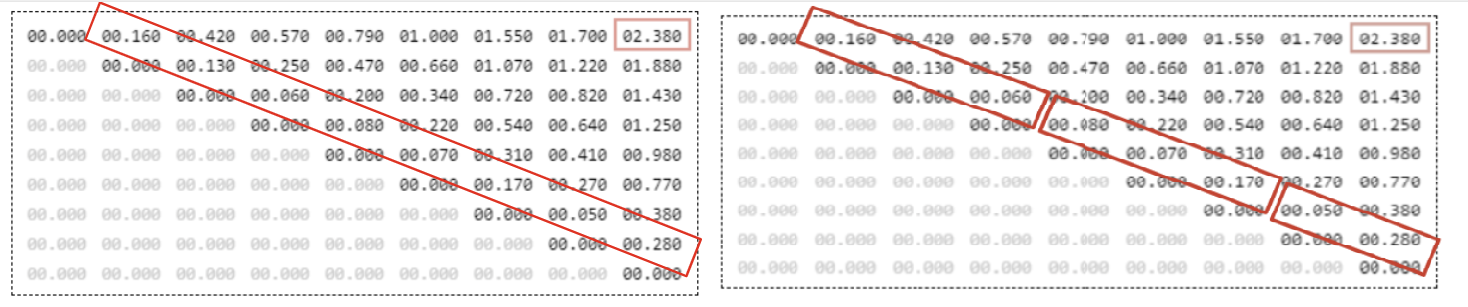

In [ ]:
%%writefile obst-mpi.cc

#include<iostream>
#include<malloc.h>
#include<sys/time.h>
#include<time.h>
#include<cstdlib>
#include<cstdio>
#include<limits>
#include <mpi.h>

using namespace std;

void alloc_matrix(void*** a,int m,int n,int size) {
    int i;
    void* storage;
    storage=(void*)malloc(m*n*size);
    *a=(void**)malloc(m*sizeof(void*));
    for(i=0;i<m;i++) {
        (*a)[i]=(char*)storage+i*n*size;
        //(*a)[i]=storage+i*n*size;
    }
}

void print_root(int& p,int* output,int** root,int low,int high) {
    if (root[low][high+1] < low || root[low][high+1] > high) return;
    output[p++]=root[low][high+1];
    printf("Root of the tree spanning %d-%d is %d\n",low,high,root[low][high+1]);
    if(low<=root[low][high+1]-1)
        print_root(p,output,root,low,root[low][high+1]-1);
    if(root[low][high+1]<=high-1)
        print_root(p,output,root,root[low][high+1]+1,high);
}

int main(int argc,char* argv[],char** envp) try {
    struct timeval timevalA;
    struct timeval timevalB;
	  int size, rank,result;
    gettimeofday(&timevalA,NULL);
    int i;
    int n;
    float* p;

    //Iniando variaveis para resolver o OBST
    float bestcost;
    int bestroot;
    float** cost;
    int low,cell;
    int j;
    int high;
    int r;
    float rcost;
    float dcost;
    int** root;
    int diag;
    float costResult;
    int rootResult;
    int lowAux,highAux;
    

    //Inicando os processos do MPI
    result = MPI_Init(&argc,&argv);
    if (result != MPI_SUCCESS) {
        cerr << "Erro iniciando MPI: " << result << '\n';
        MPI_Abort(MPI_COMM_WORLD, result);
    }
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    /*Atividades do rank 0 
    - Ler dados dos pesos de cada nós
    - Aloca matriz de custo e de raízes
    - Divide os valores de diagonal por workers 
    */

    if(rank==0) {

        fscanf(stdin,"%d",&n);
        p=(float*)malloc(n*sizeof(float));
        for(i=0;i<n;i++)
            fscanf(stdin,"%f",&p[i]);

    }

    //Envia p para workers
    MPI_Bcast(&n, 1,MPI_INT, 0, MPI_COMM_WORLD);

    if(rank!=0){
        p=(float*)malloc(n*sizeof(float));
    }
    MPI_Bcast(p, n,MPI_FLOAT, 0, MPI_COMM_WORLD);

        alloc_matrix((void***)&root,n+1,n+1,sizeof(int));
        alloc_matrix((void***)&cost,n+1,n+1,sizeof(float));

        for(int q = 0; q < n+1; q++) {
            for (int e = 0; e < n+1; e++)
                cost[q][e] = 0;
        }

        if(rank==0) {
        
        for(diag = 0; diag <= n; diag++){
        
            low = 0;
            high = diag;

            int i =1;
            // envia para low and high para os workers 
            for(cell = 0; cell <= n-diag; cell++){    
                if(i>=size){          
                    //Recebe os dados dos workers para montar matrizes COST e ROOT
                    for(int i = 1; i < size;i++){
                        MPI_Recv(&rootResult, 1, MPI_INT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                        MPI_Recv(&costResult, 1, MPI_FLOAT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                        MPI_Recv(&lowAux, 1, MPI_INT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                        MPI_Recv(&highAux, 1, MPI_INT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                        
                        //alterando matriz low e cost
                        cost[lowAux][highAux]=costResult;
                        root[lowAux][highAux]=rootResult;
                    }
                    i=1;
                }

                low = cell;
                high = cell+diag;
                MPI_Send( &low, 1, MPI_INT, i, 1, MPI_COMM_WORLD);
                MPI_Send( &high, 1, MPI_INT, i, 1, MPI_COMM_WORLD);
                i+=1;
           

            }
        
            //recebe ultima celula da diag
            for(i--;i>=1;i--){
                MPI_Recv(&rootResult, 1, MPI_INT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                MPI_Recv(&costResult, 1, MPI_FLOAT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                MPI_Recv(&lowAux, 1, MPI_INT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                MPI_Recv(&highAux, 1, MPI_INT, i, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                
                //alterando matriz low e cost
                cost[lowAux][highAux]=costResult;
                root[lowAux][highAux]=rootResult;
            }
        
            //atualiza matrizes para workers
            low = -2;
            for(i = 1; i<size;i++){
                MPI_Send(&low, 1, MPI_INT, i, 1, MPI_COMM_WORLD);
                MPI_Send(&cost[0][0], (n+1)*(n+1), MPI_FLOAT, i, 1, MPI_COMM_WORLD);
            }
        }
        
        gettimeofday(&timevalB,NULL);

        //Rule to stop workers
        low = -1;
        for(int i = 1; i<size;i++){
            MPI_Send( &low, 1, MPI_INT, i, 1, MPI_COMM_WORLD);
        }

        int tmp=0;
        int* output=new int[n];
        print_root(tmp,output,root,0,n-1);

        
        cout<<timevalB.tv_sec-timevalA.tv_sec+(timevalB.tv_usec-timevalA.tv_usec)/(double)1000000<<endl;
        //workers
    } else{

      while(true){
        
          MPI_Recv(&low, 1, MPI_INT, 0, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

          if(low ==-1) //stop process
              break;

          //Recebe matriz atualizada
          if(low==-2){
              MPI_Recv(&cost[0][0], (n+1)*(n+1), MPI_FLOAT, 0, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);    
              continue;
          }
          MPI_Recv(&high, 1, MPI_INT, 0, MPI_ANY_TAG, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

          //Calculos em cada processo
          if(low == high){
              costResult=0.0;
              rootResult=low;
          }

        
          else{
              bestcost=numeric_limits<float>::max();

              for(r=low;r<high;r++) {
                  rcost=cost[low][r]+cost[r+1][high];

                  if(rcost<bestcost) {
                      bestcost=rcost;
                      bestroot=r;
                  }
              }

              dcost = 0.0;
              for(j=low;j<high;j++) dcost+=p[j];
                  
              //escolhe valores de custo e raiz
              costResult=bestcost+dcost;
              rootResult=bestroot;
          }

          //envia resultado para root
          MPI_Send(&rootResult, 1, MPI_INT, 0, 1, MPI_COMM_WORLD);
          MPI_Send(&costResult, 1, MPI_FLOAT, 0, 1, MPI_COMM_WORLD); 
          MPI_Send(&low, 1, MPI_INT, 0, 1, MPI_COMM_WORLD);  
          MPI_Send(&high, 1, MPI_INT, 0, 1, MPI_COMM_WORLD);
           
      }

    }

    MPI_Finalize();
    return EXIT_SUCCESS;
}
catch(...){
    cerr<<"EXIT_FAILURE";
    return EXIT_FAILURE;
}


Writing obst-mpi.cc


In [ ]:
! if [ ! obst-mpi -nt obst-mpi.cc ]; then mpic++ -Wall obst-mpi.cc -o obst-mpi; fi
! mpirun --allow-run-as-root -n 4 -host localhost:4 ./obst-mpi < bst.in

Root of the tree spanning 0-7 is 5
Root of the tree spanning 0-4 is 1
Root of the tree spanning 0-0 is 0
Root of the tree spanning 2-4 is 3
Root of the tree spanning 2-2 is 2
Root of the tree spanning 4-4 is 4
Root of the tree spanning 6-7 is 7
Root of the tree spanning 6-6 is 6
0.942676


## GPU (CUDA)

O programa em CUDA não fugiu das demais abordagens, onde toda as matrizes permanecem compartilhadas em memória global e busca-se calcular cada célula em cada core da GPU. A abordagem de utilizar memória global ao invés de separar por SM, iremos discutir mais a frente. 

In [ ]:
%%writefile obst_cuda.cu

#include<iostream>
#include<malloc.h>
#include<sys/time.h>
#include<time.h>
#include<cstdlib>
#include<cstdio>

__global__
void obst(float *cost, int *root, int diag, int n, float *p){
    int low = 0, high = diag;
    int desl = 32*blockIdx.x + threadIdx.x;
    float rcost, bestcost, dcost;
    int r, j, bestroot;
    low += desl;
    high += desl;

    
    if((high > n) || (low > high)){ //caso seja um dos ultimos blocos, esse if impede de acessar posições nao alocadas
        return;
    }
    else if(low == high){
        cost[low*(n+1)+low]=0.0;
        root[low*(n+1)+low]=low;

    }
    else{
        bestcost=9999999;
        dcost = 0.0;
        for(j=low;j<high;j++) dcost+=p[j];
        for(r=low;r<high;r++) {
            rcost=cost[low*(n+1)+r]+cost[(r+1)*(n+1)+high];

            rcost+=dcost;
            if(rcost<bestcost) {
                bestcost=rcost;
                bestroot=r;
            }
        }
        cost[low*(n+1)+high]=bestcost;
        root[low*(n+1)+high]=bestroot;
        
    }

}


void print_matrix(int n, int *matriz){
    for(int i =0; i <= n;i++){
        for(int j = 0; j <= n;j++){
            if (i == j)
                printf("[%d] ", matriz[i*(n+1)+j]);
            else printf("%d ", matriz[i*(n+1)+j]);
        }
        printf("\n");
    }
    printf("\n");
}


using namespace std;
int main(int argc,char* argv[]) try {
    struct timeval timevalA;
    struct timeval timevalB;

    gettimeofday(&timevalA,NULL);
    int i;
    int n;
    int* root, *root_d;
    float* p, *p_d, *cost_d;
    void print_root(int**,int,int);
    fscanf(stdin,"%d",&n);
    p=(float*)malloc(n*sizeof(float));
    for(i=0;i<n;i++)
        fscanf(stdin,"%f",&p[i]);
    int* output=new int[n];
    printf("n = %d\n", n);
    
    //alocando as matrizes em GPU
    cudaMalloc(&p_d, n*sizeof(float));
    cudaMalloc(&cost_d, (n+1)*(n+1)*sizeof(float));
    cudaMalloc(&root_d, (n+1)*(n+1)*sizeof(float));
    root = (int*)malloc((n+1)*(n+1)*sizeof(int));
    //float *cost = (float*)malloc((n+1)*(n+1)*sizeof(float));

    //passando p para GPU
    cudaMemcpy(p_d, p, n*sizeof(float), cudaMemcpyHostToDevice);

    int tam_diag, diag;
    unsigned int num_blocos;
    dim3 blocos, threads;

     cudaError_t err;

    for(diag = 0; diag <= n; diag++){
        tam_diag = (n+1) - diag;
        num_blocos = tam_diag/32;
        if (tam_diag % 32 > 0)
            num_blocos++;
        blocos = {num_blocos, 1, 1};
        threads = {32, 1, 1};

        obst<<<blocos, threads >>>(cost_d,root_d,diag,n,p_d);

        cudaDeviceSynchronize();

        err = cudaGetLastError();
        if (err!= cudaSuccess) {
            printf("Erro: %s\n", cudaGetErrorString(err));
        }

    }
    

    cudaMemcpy(root, root_d, (n+1)*(n+1)*sizeof(float), cudaMemcpyDeviceToHost);

    //print_matrix(n, root);
    //print_root(tmp,output,&root,0,n-1);
    gettimeofday(&timevalB,NULL);

    /*
    for(int i=0;i<n;++i) {
        cout<<output[i]<<endl;
    }
    */
    cout<<timevalB.tv_sec-timevalA.tv_sec+(timevalB.tv_usec-timevalA.tv_usec)/(double)1000000<<endl;
    cudaFree(root_d);
    cudaFree(cost_d);
    cudaFree(p_d);
    return EXIT_SUCCESS;
}
catch(...) {
    cerr<<"EXIT_FAILURE";
    return EXIT_FAILURE;
}


Overwriting obst_cuda.cu


In [ ]:
! if [ ! obst_cuda -nt obst_cuda.cu ]; then nvcc obst_cuda.cu -o obst_cuda; fi
! nvprof ./obst_cuda < bst-1000.in

n = 1000
==9811== NVPROF is profiling process 9811, command: ./obst_cuda
0.431779
==9811== Profiling application: ./obst_cuda
==9811== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   98.01%  73.249ms      1001  73.176us  5.0880us  133.53us  obst(float*, int*, int, int, float*)
                    1.99%  1.4876ms         1  1.4876ms  1.4876ms  1.4876ms  [CUDA memcpy DtoH]
                    0.00%  1.9200us         1  1.9200us  1.9200us  1.9200us  [CUDA memcpy HtoD]
      API calls:   71.46%  214.64ms         3  71.547ms  71.664us  214.49ms  cudaMalloc
                   25.85%  77.646ms      1001  77.568us  7.7450us  176.74us  cudaDeviceSynchronize
                    1.49%  4.4730ms      1001  4.4680us  3.2630us  49.256us  cudaLaunchKernel
                    0.90%  2.7031ms         2  1.3515ms  18.917us  2.6841ms  cudaMemcpy
                    0.20%  596.34us         3  198.78us  184.71us  208.02us  cudaFree
    

### Considerações

 **Pergunta**: Trazer apenas a parte da matriz **cost** que é lida pelas threads para a shared memory seria uma melhoria no algoritmo?

**Problema** : A quantidade de elementos para comparar, para as últimas iterações, passa do limite do shared memmory

**Exemplificação do problema**: para a 32-ésima iteração antes da última (a maior quantidade de elementos necessários para um bloco), em uma matriz 1024*1024 serão necessários

 $(1024 - 32 + 1) * 32 + \sum\limits_{i=1}^{32-1} = 32272$ elementos

 Essa quantidade de elementos, considerando um float com tamanho de 4bytes, ocupa um espaço aproximado de 129KB, o que ultrapassa do limite da memória compartilhada por bloco de 48KB e também do limite de memória compartilhada do SM de 64KB. Imagem abaixo ilustra esse cálculo para uma matriz menor 6*6:


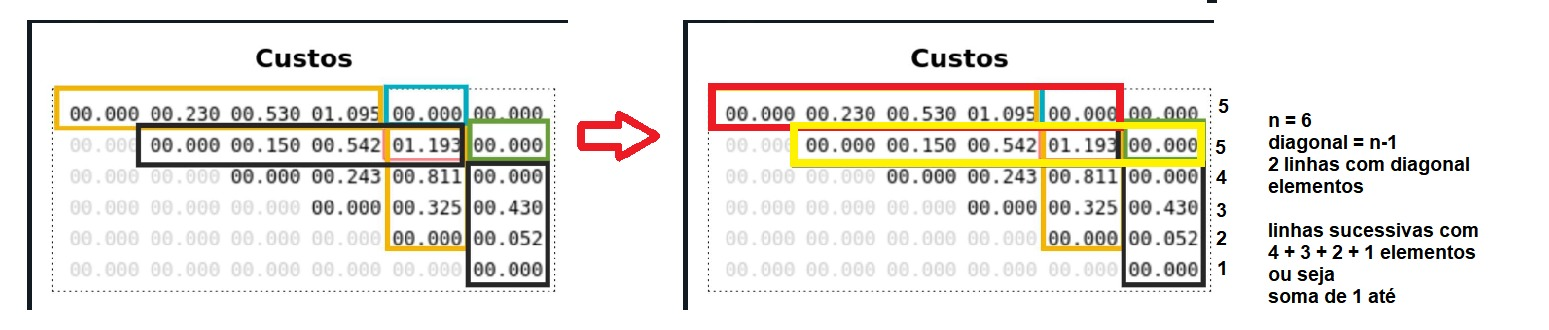


**Solução**: Não usar shared memmory e deixar a matriz cost alocada na memória global da GPU


### Memória unificada

Agora usaremos a memória unificada, gerenciada pelo CUDA

In [ ]:
%%writefile cuda_unified.cu

#include<iostream>
#include<malloc.h>
#include<sys/time.h>
#include<time.h>
#include<cstdlib>
#include<cstdio>

__global__
void obst(float *cost, int *root, int diag, int n, float *p){
    int low = 0, high = diag;
    int desl = 32*blockIdx.x + threadIdx.x;
    float rcost, bestcost, dcost;
    int r, j, bestroot;
    low += desl;
    high += desl;


    if((high > n) || (low > high)){ //caso seja um dos ultimos blocos, esse if impede de acessar posições nao alocadas
        return;
    }
    else if(low == high){
        cost[low*(n+1)+low]=0.0;
        root[low*(n+1)+low]=low;

    }
    else{
        bestcost=9999999;
        dcost = 0.0;
        for(j=low;j<high;j++) dcost+=p[j];
        for(r=low;r<high;r++) {
            rcost=cost[low*(n+1)+r]+cost[(r+1)*(n+1)+high];

            rcost+=dcost;
            if(rcost<bestcost) {
                bestcost=rcost;
                bestroot=r;
            }
        }
        cost[low*(n+1)+high]=bestcost;
        root[low*(n+1)+high]=bestroot;

    }

}


void print_matrix(int n, int *matriz){
    for(int i =0; i <= n;i++){
        for(int j = 0; j <= n;j++){
            if (i == j)
                printf("[%d] ", matriz[i*(n+1)+j]);
            else printf("%d ", matriz[i*(n+1)+j]);
        }
        printf("\n");
    }
    printf("\n");
}


using namespace std;
int main(int argc,char* argv[]) try {
    struct timeval timevalA;
    struct timeval timevalB;

    gettimeofday(&timevalA,NULL);
    int i;
    int n;
    int* root;
    float* p, *p_d, *cost;
    void print_root(int**,int,int);
    fscanf(stdin,"%d",&n);
    p=(float*)malloc(n*sizeof(float));
    for(i=0;i<n;i++)
        fscanf(stdin,"%f",&p[i]);
    int* output=new int[n];
    printf("n = %d\n", n);

    //alocando as matrizes em GPU
    cudaMalloc(&p_d, n*sizeof(float)); //vetor que não será acessado mais em CPU
                                       //não compensa alocá-lo com cudaMallocManaged

    //Agora com a memória unificada
    cudaMallocManaged(&cost, (n+1)*(n+1)*sizeof(float));
    cudaMallocManaged(&root, (n+1)*(n+1)*sizeof(float));

    cudaMemcpy(p_d, p, n*sizeof(float), cudaMemcpyHostToDevice); //passagem de p para GPU

    int tam_diag, diag;
    unsigned int num_blocos;
    dim3 blocos, threads;

    cudaError_t err;

    for(diag = 0; diag <= n; diag++){
        tam_diag = (n+1) - diag;
        num_blocos = tam_diag/32;
        if (tam_diag % 32 > 0)
            num_blocos++;
        blocos = {num_blocos, 1, 1};
        threads = {32, 1, 1};

        obst<<<blocos, threads >>>(cost,root,diag,n,p_d);

        cudaDeviceSynchronize();

        err = cudaGetLastError();
        if (err!= cudaSuccess) {
            printf("Erro: %s\n", cudaGetErrorString(err));
        }


    }


    //print_matrix(n, root);
    //print_root(tmp,output,&root,0,n-1);
    gettimeofday(&timevalB,NULL);

    /*
    for(int i=0;i<n;++i) {
        cout<<output[i]<<endl;
    }
    */
    cout<<timevalB.tv_sec-timevalA.tv_sec+(timevalB.tv_usec-timevalA.tv_usec)/(double)1000000<<endl;

    cudaFree(cost);
    cudaFree(root);
    return EXIT_SUCCESS;
}
catch(...) {
    cerr<<"EXIT_FAILURE";
    return EXIT_FAILURE;
}


Overwriting cuda_unified.cu


In [ ]:
! if [ ! cuda_unified -nt cuda_unified.cu ]; then nvcc cuda_unified.cu -o cuda_unified; fi
! nvprof ./cuda_unified < bst-1000.in

n = 1000
==9871== NVPROF is profiling process 9871, command: ./cuda_unified
0.443744
==9871== Profiling application: ./cuda_unified
==9871== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  74.471ms      1001  74.396us  6.2720us  1.2039ms  obst(float*, int*, int, int, float*)
                    0.00%  1.8880us         1  1.8880us  1.8880us  1.8880us  [CUDA memcpy HtoD]
      API calls:   66.66%  208.14ms         1  208.14ms  208.14ms  208.14ms  cudaMalloc
                   25.24%  78.817ms      1001  78.738us  10.014us  1.2111ms  cudaDeviceSynchronize
                    6.55%  20.440ms         2  10.220ms  41.926us  20.398ms  cudaMallocManaged
                    1.31%  4.0918ms      1001  4.0870us  3.2110us  26.090us  cudaLaunchKernel
                    0.12%  376.97us         2  188.49us  161.87us  215.11us  cudaFree
                    0.06%  174.38us      1001     174ns     141ns  17.101us  cudaGetLas

Diferente do esperado, cudaMallocManaged para ambas as matrizes **root** e **cost**, teve o mesmo desempenho que a versão somente com a passagem de **root** de volta para a CPU.

# Resultados

Foram obtidas durações bem variadas em nossos testes.

Podemos observar que as mudanças que realizamos ao código original já representou uma melhora significativa.

<div align="center">
  <a href="https://codepen.io/Alynva/full/wvEeNPB" target="_blank">
    <img src="https://drive.google.com/uc?export=view&id=1FYoCJoHmX2_-4ebpmKUUc3Glu4JuhE8x" width="100%" alt="result graph" />
  </a>
</div>

Para quantidade pequenas de nós, nossa solução sequencial se mostrou melhor do que as demais, mas eventualmente acaba perdendo por uma pequena margem para a versão que utiliza OpenMP e pouco depois ambos são superados pela versão utilizado CUDA.

A versão que utiliza CUDA demonstrou um desempenho praticamente constante para todas as entradas de dados que utilizamos, foi somente no último caso que utiliza 2000 nós que ela começou a demonstrar um pouco mais de "lentidão". Mas nesse ponto, todas as outras soluções já estavam levando 10x mais tempo para executar.

Infelizmente a versão que utiliza MPI foi de longe a pior de todas, perdendo até mesmo para a versão sequencial original. Acreditamos que seja por conta de nosso ambiente onde os testes foram executados, mas também vemos diversas possibilidades de melhora no algoritmo.

## Versão híbrida

Poderia ser utilizado também uma abordagem híbrida, com técnicas de OpenMP com MPI, ou MPI com CUDA, e assim por diante. Entretanto, seria necessário realizar alterações fundamentais à forma com que o algoritmo encontra a solução, para que a solução não dependa do passo anterior mas sim de um cálculo mais geral e que esse cálculo geral permita paralelização.

## Trabalhos futuros

- Não compartilhar a matriz toda, ao invés disso priorizar somente os dados necessários;
- Levar em consideração o número de comparações que cada worker fará para agrupar tarefas que realizam poucas comparações;
- Paralelizar a busca do menor número (e seu índice) de um vetor;